In [2]:
import re
import sys
from collections import defaultdict
from os import cpu_count, walk, path
from typing import List, Tuple

import nltk
import pandas as pd
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from numpy import ndarray
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import conf

csvfile = '../Semantic-Analysis-Regulations/regulations_data_analysis.csv'
doc2vec_model_name = 'doc2vec_model_{}'.format(conf.DATA_SOURCE)

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/bumblebee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bumblebee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def tokenize(text: str) -> List[str]:
    # Tokenize
    tokenized_text: List[str] = nltk.word_tokenize(text)

    # Remove unwanted words (numbers and stopwords)
    stops: List[str] = stopwords.words('english')
    # TODO: Do we need to filter out numbers?
    tokenized_text: List[str] = [token for token in tokenized_text
                                  if re.match(r'.*[A-Za-z].*', token)
                                  and token not in stops]

    # Stemming
    # https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokenized_text]

In [9]:
def build_model(documents: List[str]) -> None:
    print('Building Doc2Vec model')

    model = Doc2Vec(vector_size=conf.VECTOR_SIZE,
                    window=conf.WINDOW,
                    min_count=conf.MIN_COUNT,
                    workers=cpu_count() - 1,
                    epochs=conf.EPOCHS)
    model.build_vocab(documents)
    model.train(documents,
                total_examples=len(documents),
                epochs=model.iter)
    model.save(doc2vec_model_name)
    
def load_model() -> Doc2Vec:
    return Doc2Vec.load(doc2vec_model_name)

In [5]:
def cluster() -> Tuple[KMeans, ndarray]:
    kmeans_model = KMeans(n_clusters=conf.N_CLUSTERS,
                          n_jobs=-1,
                          #verbose=True
                          )
    colors = kmeans_model.fit_predict(load_model().docvecs.vectors_docs)
    return (kmeans_model, colors)

In [6]:
documents: List[TaggedDocument] = []
tags: List[str] = []
if conf.DATA_SOURCE == 'long_title':
    with open(csvfile, 'r') as f:
        df = pd.read_csv(f)
        tags = long_titles = df['long_title']
    documents = [TaggedDocument(doc, [i])
                 for i, doc in enumerate([tokenize(title)
                                          for title in long_titles])]
elif conf.DATA_SOURCE == 'full_text':
    for root, _, files in walk('txt'):
        tags = sorted(files)
        for i, name in enumerate(tags):
            print('Loading file {}'.format(name))
            with open(path.join(root, name), 'r') as f:
                documents.append(TaggedDocument(tokenize(f.read()), [i]))
        break
else:
    print('Invalid data source')
    sys.exit(1)

Loading file C.R.C.,_c._10
Loading file C.R.C.,_c._100
Loading file C.R.C.,_c._101


Loading file C.R.C.,_c._1013
Loading file C.R.C.,_c._1015
Loading file C.R.C.,_c._102
Loading file C.R.C.,_c._1021


Loading file C.R.C.,_c._1022
Loading file C.R.C.,_c._1023
Loading file C.R.C.,_c._1026
Loading file C.R.C.,_c._1027
Loading file C.R.C.,_c._103
Loading file C.R.C.,_c._1033
Loading file C.R.C.,_c._1035


Loading file C.R.C.,_c._1036


Loading file C.R.C.,_c._1038


Loading file C.R.C.,_c._104
Loading file C.R.C.,_c._1041


Loading file C.R.C.,_c._1044
Loading file C.R.C.,_c._1045
Loading file C.R.C.,_c._1046
Loading file C.R.C.,_c._1048
Loading file C.R.C.,_c._1049


Loading file C.R.C.,_c._105


Loading file C.R.C.,_c._1050
Loading file C.R.C.,_c._1055
Loading file C.R.C.,_c._1058


Loading file C.R.C.,_c._106
Loading file C.R.C.,_c._109
Loading file C.R.C.,_c._1105


Loading file C.R.C.,_c._1107
Loading file C.R.C.,_c._111


Loading file C.R.C.,_c._1111
Loading file C.R.C.,_c._1112


Loading file C.R.C.,_c._1114
Loading file C.R.C.,_c._112
Loading file C.R.C.,_c._1120
Loading file C.R.C.,_c._1126


Loading file C.R.C.,_c._113
Loading file C.R.C.,_c._1130
Loading file C.R.C.,_c._1134
Loading file C.R.C.,_c._114
Loading file C.R.C.,_c._1145


Loading file C.R.C.,_c._1146
Loading file C.R.C.,_c._1147
Loading file C.R.C.,_c._1148


Loading file C.R.C.,_c._115
Loading file C.R.C.,_c._1151
Loading file C.R.C.,_c._1152
Loading file C.R.C.,_c._116
Loading file C.R.C.,_c._117


Loading file C.R.C.,_c._1171


Loading file C.R.C.,_c._118
Loading file C.R.C.,_c._1182
Loading file C.R.C.,_c._1183
Loading file C.R.C.,_c._1185
Loading file C.R.C.,_c._1195
Loading file C.R.C.,_c._121
Loading file C.R.C.,_c._122
Loading file C.R.C.,_c._1225
Loading file C.R.C.,_c._123


Loading file C.R.C.,_c._1231
Loading file C.R.C.,_c._1232
Loading file C.R.C.,_c._1235
Loading file C.R.C.,_c._1236
Loading file C.R.C.,_c._1238
Loading file C.R.C.,_c._1239
Loading file C.R.C.,_c._1240
Loading file C.R.C.,_c._1241
Loading file C.R.C.,_c._1242
Loading file C.R.C.,_c._1244
Loading file C.R.C.,_c._1245
Loading file C.R.C.,_c._1246
Loading file C.R.C.,_c._1247
Loading file C.R.C.,_c._125
Loading file C.R.C.,_c._1253


Loading file C.R.C.,_c._1254
Loading file C.R.C.,_c._1264
Loading file C.R.C.,_c._1266
Loading file C.R.C.,_c._1268


Loading file C.R.C.,_c._1270
Loading file C.R.C.,_c._1274
Loading file C.R.C.,_c._128
Loading file C.R.C.,_c._1283
Loading file C.R.C.,_c._1288
Loading file C.R.C.,_c._129
Loading file C.R.C.,_c._1292
Loading file C.R.C.,_c._1295
Loading file C.R.C.,_c._1296
Loading file C.R.C.,_c._1298
Loading file C.R.C.,_c._130


Loading file C.R.C.,_c._1301
Loading file C.R.C.,_c._1302
Loading file C.R.C.,_c._1303
Loading file C.R.C.,_c._1304
Loading file C.R.C.,_c._1305
Loading file C.R.C.,_c._1306
Loading file C.R.C.,_c._1307
Loading file C.R.C.,_c._1308
Loading file C.R.C.,_c._1309
Loading file C.R.C.,_c._1311
Loading file C.R.C.,_c._1312
Loading file C.R.C.,_c._1314
Loading file C.R.C.,_c._1315
Loading file C.R.C.,_c._1316


Loading file C.R.C.,_c._1317
Loading file C.R.C.,_c._1318
Loading file C.R.C.,_c._1319
Loading file C.R.C.,_c._1320
Loading file C.R.C.,_c._1321
Loading file C.R.C.,_c._1326
Loading file C.R.C.,_c._1328
Loading file C.R.C.,_c._133
Loading file C.R.C.,_c._1330
Loading file C.R.C.,_c._1331
Loading file C.R.C.,_c._1332
Loading file C.R.C.,_c._1333
Loading file C.R.C.,_c._1335
Loading file C.R.C.,_c._1336
Loading file C.R.C.,_c._134
Loading file C.R.C.,_c._1341


Loading file C.R.C.,_c._1342
Loading file C.R.C.,_c._135
Loading file C.R.C.,_c._1352
Loading file C.R.C.,_c._1354
Loading file C.R.C.,_c._1355
Loading file C.R.C.,_c._1356
Loading file C.R.C.,_c._1357
Loading file C.R.C.,_c._1358


Loading file C.R.C.,_c._1359
Loading file C.R.C.,_c._1360
Loading file C.R.C.,_c._1365
Loading file C.R.C.,_c._1367
Loading file C.R.C.,_c._1368
Loading file C.R.C.,_c._1370


Loading file C.R.C.,_c._1375
Loading file C.R.C.,_c._1376
Loading file C.R.C.,_c._1377
Loading file C.R.C.,_c._1378
Loading file C.R.C.,_c._1379
Loading file C.R.C.,_c._1380
Loading file C.R.C.,_c._1381
Loading file C.R.C.,_c._1382
Loading file C.R.C.,_c._1384
Loading file C.R.C.,_c._1385
Loading file C.R.C.,_c._1386
Loading file C.R.C.,_c._1387


Loading file C.R.C.,_c._1388
Loading file C.R.C.,_c._1390
Loading file C.R.C.,_c._1392
Loading file C.R.C.,_c._1393


Loading file C.R.C.,_c._1394
Loading file C.R.C.,_c._14
Loading file C.R.C.,_c._140
Loading file C.R.C.,_c._1400


Loading file C.R.C.,_c._1403
Loading file C.R.C.,_c._1404
Loading file C.R.C.,_c._1405


Loading file C.R.C.,_c._1407
Loading file C.R.C.,_c._1416


Loading file C.R.C.,_c._1418
Loading file C.R.C.,_c._142
Loading file C.R.C.,_c._1422
Loading file C.R.C.,_c._1424
Loading file C.R.C.,_c._1425


Loading file C.R.C.,_c._1427
Loading file C.R.C.,_c._1429
Loading file C.R.C.,_c._1430
Loading file C.R.C.,_c._1431


Loading file C.R.C.,_c._1432


Loading file C.R.C.,_c._1435


Loading file C.R.C.,_c._1436


Loading file C.R.C.,_c._1440
Loading file C.R.C.,_c._1441
Loading file C.R.C.,_c._1442


Loading file C.R.C.,_c._1448
Loading file C.R.C.,_c._1458
Loading file C.R.C.,_c._1465


Loading file C.R.C.,_c._1467
Loading file C.R.C.,_c._147
Loading file C.R.C.,_c._1472
Loading file C.R.C.,_c._1479
Loading file C.R.C.,_c._148


Loading file C.R.C.,_c._1480
Loading file C.R.C.,_c._1482
Loading file C.R.C.,_c._1486


Loading file C.R.C.,_c._1487
Loading file C.R.C.,_c._149
Loading file C.R.C.,_c._1494
Loading file C.R.C.,_c._1495
Loading file C.R.C.,_c._1496
Loading file C.R.C.,_c._1498


Loading file C.R.C.,_c._15
Loading file C.R.C.,_c._150
Loading file C.R.C.,_c._1501
Loading file C.R.C.,_c._1504
Loading file C.R.C.,_c._1509
Loading file C.R.C.,_c._1511


Loading file C.R.C.,_c._1516
Loading file C.R.C.,_c._1517


Loading file C.R.C.,_c._1518


Loading file C.R.C.,_c._152
Loading file C.R.C.,_c._1520
Loading file C.R.C.,_c._1521
Loading file C.R.C.,_c._1522
Loading file C.R.C.,_c._1523
Loading file C.R.C.,_c._1524


Loading file C.R.C.,_c._1525
Loading file C.R.C.,_c._1526
Loading file C.R.C.,_c._1527
Loading file C.R.C.,_c._1530
Loading file C.R.C.,_c._1533
Loading file C.R.C.,_c._1535
Loading file C.R.C.,_c._1537
Loading file C.R.C.,_c._1539
Loading file C.R.C.,_c._154
Loading file C.R.C.,_c._1540
Loading file C.R.C.,_c._1541
Loading file C.R.C.,_c._1547
Loading file C.R.C.,_c._1548


Loading file C.R.C.,_c._1549
Loading file C.R.C.,_c._155
Loading file C.R.C.,_c._1550
Loading file C.R.C.,_c._1551
Loading file C.R.C.,_c._1552
Loading file C.R.C.,_c._1560
Loading file C.R.C.,_c._1561


Loading file C.R.C.,_c._1563
Loading file C.R.C.,_c._1564
Loading file C.R.C.,_c._1566
Loading file C.R.C.,_c._1575


Loading file C.R.C.,_c._1578
Loading file C.R.C.,_c._1579
Loading file C.R.C.,_c._1581
Loading file C.R.C.,_c._1582
Loading file C.R.C.,_c._1584
Loading file C.R.C.,_c._1585
Loading file C.R.C.,_c._1586
Loading file C.R.C.,_c._1587
Loading file C.R.C.,_c._1588
Loading file C.R.C.,_c._1590
Loading file C.R.C.,_c._1593
Loading file C.R.C.,_c._1594


Loading file C.R.C.,_c._1596
Loading file C.R.C.,_c._1597
Loading file C.R.C.,_c._1598
Loading file C.R.C.,_c._1599
Loading file C.R.C.,_c._16
Loading file C.R.C.,_c._160
Loading file C.R.C.,_c._1600
Loading file C.R.C.,_c._1601
Loading file C.R.C.,_c._1602


Loading file C.R.C.,_c._1603


Loading file C.R.C.,_c._1604
Loading file C.R.C.,_c._1605


Loading file C.R.C.,_c._1607
Loading file C.R.C.,_c._1609


Loading file C.R.C.,_c._1610
Loading file C.R.C.,_c._1611
Loading file C.R.C.,_c._162
Loading file C.R.C.,_c._1621
Loading file C.R.C.,_c._1622
Loading file C.R.C.,_c._1623
Loading file C.R.C.,_c._164
Loading file C.R.C.,_c._165
Loading file C.R.C.,_c._166
Loading file C.R.C.,_c._167
Loading file C.R.C.,_c._168
Loading file C.R.C.,_c._169
Loading file C.R.C.,_c._170
Loading file C.R.C.,_c._176
Loading file C.R.C.,_c._177
Loading file C.R.C.,_c._178
Loading file C.R.C.,_c._179
Loading file C.R.C.,_c._180
Loading file C.R.C.,_c._181
Loading file C.R.C.,_c._182
Loading file C.R.C.,_c._183


Loading file C.R.C.,_c._185
Loading file C.R.C.,_c._186
Loading file C.R.C.,_c._194
Loading file C.R.C.,_c._19552561
Loading file C.R.C.,_c._198
Loading file C.R.C.,_c._201
Loading file C.R.C.,_c._207
Loading file C.R.C.,_c._208
Loading file C.R.C.,_c._209
Loading file C.R.C.,_c._210
Loading file C.R.C.,_c._211
Loading file C.R.C.,_c._212
Loading file C.R.C.,_c._213
Loading file C.R.C.,_c._215
Loading file C.R.C.,_c._216
Loading file C.R.C.,_c._217
Loading file C.R.C.,_c._218
Loading file C.R.C.,_c._220
Loading file C.R.C.,_c._221
Loading file C.R.C.,_c._223


Loading file C.R.C.,_c._224
Loading file C.R.C.,_c._225
Loading file C.R.C.,_c._226
Loading file C.R.C.,_c._228
Loading file C.R.C.,_c._229
Loading file C.R.C.,_c._232
Loading file C.R.C.,_c._233
Loading file C.R.C.,_c._234
Loading file C.R.C.,_c._235
Loading file C.R.C.,_c._236
Loading file C.R.C.,_c._237
Loading file C.R.C.,_c._238
Loading file C.R.C.,_c._239
Loading file C.R.C.,_c._240
Loading file C.R.C.,_c._243
Loading file C.R.C.,_c._258
Loading file C.R.C.,_c._259
Loading file C.R.C.,_c._260
Loading file C.R.C.,_c._268
Loading file C.R.C.,_c._269
Loading file C.R.C.,_c._270
Loading file C.R.C.,_c._271
Loading file C.R.C.,_c._272


Loading file C.R.C.,_c._273
Loading file C.R.C.,_c._274
Loading file C.R.C.,_c._275
Loading file C.R.C.,_c._276
Loading file C.R.C.,_c._277
Loading file C.R.C.,_c._280
Loading file C.R.C.,_c._281
Loading file C.R.C.,_c._284
Loading file C.R.C.,_c._285


Loading file C.R.C.,_c._287
Loading file C.R.C.,_c._289
Loading file C.R.C.,_c._290


Loading file C.R.C.,_c._291


Loading file C.R.C.,_c._296


Loading file C.R.C.,_c._316
Loading file C.R.C.,_c._317
Loading file C.R.C.,_c._319
Loading file C.R.C.,_c._320
Loading file C.R.C.,_c._322
Loading file C.R.C.,_c._332


Loading file C.R.C.,_c._334
Loading file C.R.C.,_c._335
Loading file C.R.C.,_c._340
Loading file C.R.C.,_c._342
Loading file C.R.C.,_c._343
Loading file C.R.C.,_c._345
Loading file C.R.C.,_c._347
Loading file C.R.C.,_c._348
Loading file C.R.C.,_c._349


Loading file C.R.C.,_c._353
Loading file C.R.C.,_c._354
Loading file C.R.C.,_c._355
Loading file C.R.C.,_c._356
Loading file C.R.C.,_c._368


Loading file C.R.C.,_c._369
Loading file C.R.C.,_c._375
Loading file C.R.C.,_c._378
Loading file C.R.C.,_c._385


Loading file C.R.C.,_c._386
Loading file C.R.C.,_c._390
Loading file C.R.C.,_c._391
Loading file C.R.C.,_c._394
Loading file C.R.C.,_c._395
Loading file C.R.C.,_c._396


Loading file C.R.C.,_c._397
Loading file C.R.C.,_c._398
Loading file C.R.C.,_c._399
Loading file C.R.C.,_c._4
Loading file C.R.C.,_c._401
Loading file C.R.C.,_c._407
Loading file C.R.C.,_c._413
Loading file C.R.C.,_c._416


Loading file C.R.C.,_c._417
Loading file C.R.C.,_c._418
Loading file C.R.C.,_c._421
Loading file C.R.C.,_c._424
Loading file C.R.C.,_c._425
Loading file C.R.C.,_c._427
Loading file C.R.C.,_c._430
Loading file C.R.C.,_c._440


Loading file C.R.C.,_c._446
Loading file C.R.C.,_c._448
Loading file C.R.C.,_c._449
Loading file C.R.C.,_c._450
Loading file C.R.C.,_c._478
Loading file C.R.C.,_c._487


Loading file C.R.C.,_c._489
Loading file C.R.C.,_c._516
Loading file C.R.C.,_c._517
Loading file C.R.C.,_c._522
Loading file C.R.C.,_c._533
Loading file C.R.C.,_c._535


Loading file C.R.C.,_c._549
Loading file C.R.C.,_c._554
Loading file C.R.C.,_c._565
Loading file C.R.C.,_c._566
Loading file C.R.C.,_c._571
Loading file C.R.C.,_c._590
Loading file C.R.C.,_c._591
Loading file C.R.C.,_c._594
Loading file C.R.C.,_c._598
Loading file C.R.C.,_c._599


Loading file C.R.C.,_c._603
Loading file C.R.C.,_c._604
Loading file C.R.C.,_c._606
Loading file C.R.C.,_c._609
Loading file C.R.C.,_c._611


Loading file C.R.C.,_c._612
Loading file C.R.C.,_c._613
Loading file C.R.C.,_c._616
Loading file C.R.C.,_c._623
Loading file C.R.C.,_c._625
Loading file C.R.C.,_c._632
Loading file C.R.C.,_c._640
Loading file C.R.C.,_c._645
Loading file C.R.C.,_c._646
Loading file C.R.C.,_c._647


Loading file C.R.C.,_c._648
Loading file C.R.C.,_c._654
Loading file C.R.C.,_c._657
Loading file C.R.C.,_c._658
Loading file C.R.C.,_c._659
Loading file C.R.C.,_c._660
Loading file C.R.C.,_c._664
Loading file C.R.C.,_c._666
Loading file C.R.C.,_c._669
Loading file C.R.C.,_c._670
Loading file C.R.C.,_c._671
Loading file C.R.C.,_c._672
Loading file C.R.C.,_c._675


Loading file C.R.C.,_c._676
Loading file C.R.C.,_c._679
Loading file C.R.C.,_c._681
Loading file C.R.C.,_c._682
Loading file C.R.C.,_c._686
Loading file C.R.C.,_c._687
Loading file C.R.C.,_c._688
Loading file C.R.C.,_c._689
Loading file C.R.C.,_c._690
Loading file C.R.C.,_c._691
Loading file C.R.C.,_c._692
Loading file C.R.C.,_c._698
Loading file C.R.C.,_c._707
Loading file C.R.C.,_c._708
Loading file C.R.C.,_c._709
Loading file C.R.C.,_c._710
Loading file C.R.C.,_c._712
Loading file C.R.C.,_c._713
Loading file C.R.C.,_c._716
Loading file C.R.C.,_c._719
Loading file C.R.C.,_c._721
Loading file C.R.C.,_c._722


Loading file C.R.C.,_c._723
Loading file C.R.C.,_c._730
Loading file C.R.C.,_c._731
Loading file C.R.C.,_c._732
Loading file C.R.C.,_c._734
Loading file C.R.C.,_c._735
Loading file C.R.C.,_c._736
Loading file C.R.C.,_c._739
Loading file C.R.C.,_c._743
Loading file C.R.C.,_c._75
Loading file C.R.C.,_c._751
Loading file C.R.C.,_c._752
Loading file C.R.C.,_c._754
Loading file C.R.C.,_c._755
Loading file C.R.C.,_c._756
Loading file C.R.C.,_c._757
Loading file C.R.C.,_c._758
Loading file C.R.C.,_c._759
Loading file C.R.C.,_c._762
Loading file C.R.C.,_c._763
Loading file C.R.C.,_c._767
Loading file C.R.C.,_c._768
Loading file C.R.C.,_c._77


Loading file C.R.C.,_c._770
Loading file C.R.C.,_c._771
Loading file C.R.C.,_c._772
Loading file C.R.C.,_c._773
Loading file C.R.C.,_c._778
Loading file C.R.C.,_c._78
Loading file C.R.C.,_c._780
Loading file C.R.C.,_c._785
Loading file C.R.C.,_c._786
Loading file C.R.C.,_c._79
Loading file C.R.C.,_c._790


Loading file C.R.C.,_c._791
Loading file C.R.C.,_c._793
Loading file C.R.C.,_c._794
Loading file C.R.C.,_c._795
Loading file C.R.C.,_c._797
Loading file C.R.C.,_c._799
Loading file C.R.C.,_c._80
Loading file C.R.C.,_c._802


Loading file C.R.C.,_c._803
Loading file C.R.C.,_c._81
Loading file C.R.C.,_c._811
Loading file C.R.C.,_c._812
Loading file C.R.C.,_c._815
Loading file C.R.C.,_c._818
Loading file C.R.C.,_c._82
Loading file C.R.C.,_c._828


Loading file C.R.C.,_c._829
Loading file C.R.C.,_c._83
Loading file C.R.C.,_c._836
Loading file C.R.C.,_c._837
Loading file C.R.C.,_c._84
Loading file C.R.C.,_c._847
Loading file C.R.C.,_c._854


Loading file C.R.C.,_c._864
Loading file C.R.C.,_c._868
Loading file C.R.C.,_c._869
Loading file C.R.C.,_c._87
Loading file C.R.C.,_c._870


Loading file C.R.C.,_c._879
Loading file C.R.C.,_c._88
Loading file C.R.C.,_c._880
Loading file C.R.C.,_c._886


Loading file C.R.C.,_c._887
Loading file C.R.C.,_c._889
Loading file C.R.C.,_c._89
Loading file C.R.C.,_c._890
Loading file C.R.C.,_c._90


Loading file C.R.C.,_c._91
Loading file C.R.C.,_c._910
Loading file C.R.C.,_c._911
Loading file C.R.C.,_c._915
Loading file C.R.C.,_c._92


Loading file C.R.C.,_c._923
Loading file C.R.C.,_c._924
Loading file C.R.C.,_c._927
Loading file C.R.C.,_c._929
Loading file C.R.C.,_c._93
Loading file C.R.C.,_c._930
Loading file C.R.C.,_c._931
Loading file C.R.C.,_c._932
Loading file C.R.C.,_c._933
Loading file C.R.C.,_c._934
Loading file C.R.C.,_c._945


Loading file C.R.C.,_c._946
Loading file C.R.C.,_c._948
Loading file C.R.C.,_c._949
Loading file C.R.C.,_c._95
Loading file C.R.C.,_c._950
Loading file C.R.C.,_c._952
Loading file C.R.C.,_c._953
Loading file C.R.C.,_c._954
Loading file C.R.C.,_c._956


Loading file C.R.C.,_c._957
Loading file C.R.C.,_c._959
Loading file C.R.C.,_c._96
Loading file C.R.C.,_c._960
Loading file C.R.C.,_c._961
Loading file C.R.C.,_c._966
Loading file C.R.C.,_c._967
Loading file C.R.C.,_c._968
Loading file C.R.C.,_c._969


Loading file C.R.C.,_c._970
Loading file C.R.C.,_c._971
Loading file C.R.C.,_c._972
Loading file C.R.C.,_c._98
Loading file C.R.C.,_c._982


Loading file C.R.C.,_c._984
Loading file C.R.C.,_c._985
Loading file C.R.C.,_c._986
Loading file C.R.C.,_c._987


Loading file C.R.C.,_c._99
Loading file C.R.C.,_c._990
Loading file C.R.C.,_c._991
Loading file C.R.C.,_c._992
Loading file SI-2000-100
Loading file SI-2000-101
Loading file SI-2000-102
Loading file SI-2000-103
Loading file SI-2000-104
Loading file SI-2000-111
Loading file SI-2000-16
Loading file SI-2000-23
Loading file SI-2000-33
Loading file SI-2000-39
Loading file SI-2000-53
Loading file SI-2000-54
Loading file SI-2000-69
Loading file SI-2000-77
Loading file SI-2000-82


Loading file SI-2000-84
Loading file SI-2000-90
Loading file SI-2000-99
Loading file SI-2001-1
Loading file SI-2001-109
Loading file SI-2001-120
Loading file SI-2001-23
Loading file SI-2001-27
Loading file SI-2001-28
Loading file SI-2001-45
Loading file SI-2001-47
Loading file SI-2001-48
Loading file SI-2001-50
Loading file SI-2001-51
Loading file SI-2001-60
Loading file SI-2001-68
Loading file SI-2001-69


Loading file SI-2001-72
Loading file SI-2001-73
Loading file SI-2001-74
Loading file SI-2001-81
Loading file SI-2001-93
Loading file SI-2001-96
Loading file SI-2001-99
Loading file SI-2002-1


Loading file SI-2002-10
Loading file SI-2002-123
Loading file SI-2002-142
Loading file SI-2002-154
Loading file SI-2002-160
Loading file SI-2002-46
Loading file SI-2002-58
Loading file SI-2002-60
Loading file SI-2002-61
Loading file SI-2002-62
Loading file SI-2002-65
Loading file SI-2002-75
Loading file SI-2002-9
Loading file SI-2002-96


Loading file SI-2003-103
Loading file SI-2003-107
Loading file SI-2003-112
Loading file SI-2003-119
Loading file SI-2003-122
Loading file SI-2003-124
Loading file SI-2003-130
Loading file SI-2003-133
Loading file SI-2003-134


Loading file SI-2003-146
Loading file SI-2003-148
Loading file SI-2003-149
Loading file SI-2003-154


Loading file SI-2003-155
Loading file SI-2003-156
Loading file SI-2003-159
Loading file SI-2003-164
Loading file SI-2003-166
Loading file SI-2003-171
Loading file SI-2003-173
Loading file SI-2003-188
Loading file SI-2003-2


Loading file SI-2003-202
Loading file SI-2003-203
Loading file SI-2003-204
Loading file SI-2003-208
Loading file SI-2003-209
Loading file SI-2003-210
Loading file SI-2003-214
Loading file SI-2003-215
Loading file SI-2003-216
Loading file SI-2003-217
Loading file SI-2003-221
Loading file SI-2003-222
Loading file SI-2003-226
Loading file SI-2003-227
Loading file SI-2003-228
Loading file SI-2003-229
Loading file SI-2003-230
Loading file SI-2003-231
Loading file SI-2003-232
Loading file SI-2003-233
Loading file SI-2003-240
Loading file SI-2003-244
Loading file SI-2003-36


Loading file SI-2003-38
Loading file SI-2003-4
Loading file SI-2003-42
Loading file SI-2003-5


Loading file SI-2003-58
Loading file SI-2003-6
Loading file SI-2003-93
Loading file SI-2004-100
Loading file SI-2004-101
Loading file SI-2004-102
Loading file SI-2004-103
Loading file SI-2004-109
Loading file SI-2004-112
Loading file SI-2004-122
Loading file SI-2004-123
Loading file SI-2004-13
Loading file SI-2004-132
Loading file SI-2004-133
Loading file SI-2004-134


Loading file SI-2004-135
Loading file SI-2004-136
Loading file SI-2004-138
Loading file SI-2004-14
Loading file SI-2004-148
Loading file SI-2004-153
Loading file SI-2004-155
Loading file SI-2004-16
Loading file SI-2004-164
Loading file SI-2004-34


Loading file SI-2004-35
Loading file SI-2004-36
Loading file SI-2004-41
Loading file SI-2004-43
Loading file SI-2004-44
Loading file SI-2004-48
Loading file SI-2004-55
Loading file SI-2004-6
Loading file SI-2004-7
Loading file SI-2004-8
Loading file SI-2004-86
Loading file SI-2004-87
Loading file SI-2004-88
Loading file SI-2004-90
Loading file SI-2005-106
Loading file SI-2005-113
Loading file SI-2005-114
Loading file SI-2005-115
Loading file SI-2005-118


Loading file SI-2005-120
Loading file SI-2005-124
Loading file SI-2005-125
Loading file SI-2005-127
Loading file SI-2005-128
Loading file SI-2005-17
Loading file SI-2005-2
Loading file SI-2005-48
Loading file SI-2005-50
Loading file SI-2005-55
Loading file SI-2005-59
Loading file SI-2005-65
Loading file SI-2005-71
Loading file SI-2005-72
Loading file SI-2005-73
Loading file SI-2005-8
Loading file SI-2005-83
Loading file SI-2005-86
Loading file SI-2005-87


Loading file SI-2005-9
Loading file SI-2005-91
Loading file SI-2006-10
Loading file SI-2006-100
Loading file SI-2006-101
Loading file SI-2006-109
Loading file SI-2006-11
Loading file SI-2006-110
Loading file SI-2006-121
Loading file SI-2006-122


Loading file SI-2006-123
Loading file SI-2006-124
Loading file SI-2006-128
Loading file SI-2006-133
Loading file SI-2006-134
Loading file SI-2006-135
Loading file SI-2006-137
Loading file SI-2006-141
Loading file SI-2006-142


Loading file SI-2006-144
Loading file SI-2006-16
Loading file SI-2006-17
Loading file SI-2006-18
Loading file SI-2006-22
Loading file SI-2006-23
Loading file SI-2006-26
Loading file SI-2006-27
Loading file SI-2006-28
Loading file SI-2006-29
Loading file SI-2006-30
Loading file SI-2006-31
Loading file SI-2006-32
Loading file SI-2006-37
Loading file SI-2006-38
Loading file SI-2006-39
Loading file SI-2006-4
Loading file SI-2006-40
Loading file SI-2006-45
Loading file SI-2006-46
Loading file SI-2006-47


Loading file SI-2006-51
Loading file SI-2006-60
Loading file SI-2006-61
Loading file SI-2006-62
Loading file SI-2006-63
Loading file SI-2006-64
Loading file SI-2006-69
Loading file SI-2006-71
Loading file SI-2006-72
Loading file SI-2006-73
Loading file SI-2006-74
Loading file SI-2006-75
Loading file SI-2006-76
Loading file SI-2006-77
Loading file SI-2006-79
Loading file SI-2006-80
Loading file SI-2006-85
Loading file SI-2006-89
Loading file SI-2006-97
Loading file SI-2006-98
Loading file SI-2007-101
Loading file SI-2007-102
Loading file SI-2007-103
Loading file SI-2007-115


Loading file SI-2007-13
Loading file SI-2007-14
Loading file SI-2007-31
Loading file SI-2007-37
Loading file SI-2007-57
Loading file SI-2007-61
Loading file SI-2007-68
Loading file SI-2007-69
Loading file SI-2007-80
Loading file SI-2007-87
Loading file SI-2008-101
Loading file SI-2008-102
Loading file SI-2008-103
Loading file SI-2008-104
Loading file SI-2008-136
Loading file SI-2008-143
Loading file SI-2008-148
Loading file SI-2008-15
Loading file SI-2008-16
Loading file SI-2008-20
Loading file SI-2008-23
Loading file SI-2008-25


Loading file SI-2008-26
Loading file SI-2008-27
Loading file SI-2008-28
Loading file SI-2008-53
Loading file SI-2008-55
Loading file SI-2008-69
Loading file SI-2008-70
Loading file SI-2008-95
Loading file SI-2008-99
Loading file SI-2009-103
Loading file SI-2009-104
Loading file SI-2009-110
Loading file SI-2009-20
Loading file SI-2009-22
Loading file SI-2009-23
Loading file SI-2009-24
Loading file SI-2009-3


Loading file SI-2009-45
Loading file SI-2009-46
Loading file SI-2009-61
Loading file SI-2009-73
Loading file SI-2009-87
Loading file SI-2009-94
Loading file SI-2009-95
Loading file SI-2010-10
Loading file SI-2010-13
Loading file SI-2010-14


Loading file SI-2010-18
Loading file SI-2010-42
Loading file SI-2010-45
Loading file SI-2010-46
Loading file SI-2010-54
Loading file SI-2010-76
Loading file SI-2010-81
Loading file SI-2010-83
Loading file SI-2010-84
Loading file SI-2010-90
Loading file SI-2011-100
Loading file SI-2011-109
Loading file SI-2011-11
Loading file SI-2011-111


Loading file SI-2011-14
Loading file SI-2011-20
Loading file SI-2011-48
Loading file SI-2011-56


Loading file SI-2011-58
Loading file SI-2011-59
Loading file SI-2011-60
Loading file SI-2011-66
Loading file SI-2011-67
Loading file SI-2011-68
Loading file SI-2011-69
Loading file SI-2011-77
Loading file SI-2011-78
Loading file SI-2011-89
Loading file SI-2011-9
Loading file SI-2011-90


Loading file SI-2011-91
Loading file SI-2011-92
Loading file SI-2011-93
Loading file SI-2011-94
Loading file SI-2011-95
Loading file SI-2011-96
Loading file SI-2012-103
Loading file SI-2012-12
Loading file SI-2012-16
Loading file SI-2012-17
Loading file SI-2012-20
Loading file SI-2012-23
Loading file SI-2012-24
Loading file SI-2012-25
Loading file SI-2012-26
Loading file SI-2012-27


Loading file SI-2012-30
Loading file SI-2012-39
Loading file SI-2012-43
Loading file SI-2012-45
Loading file SI-2012-46
Loading file SI-2012-50
Loading file SI-2012-58
Loading file SI-2012-59
Loading file SI-2012-60
Loading file SI-2012-64
Loading file SI-2012-7


Loading file SI-2012-72
Loading file SI-2012-76
Loading file SI-2012-78
Loading file SI-2012-80
Loading file SI-2012-81
Loading file SI-2012-82
Loading file SI-2012-83
Loading file SI-2012-9
Loading file SI-2013-1
Loading file SI-2013-102


Loading file SI-2013-106
Loading file SI-2013-109
Loading file SI-2013-110
Loading file SI-2013-114
Loading file SI-2013-125
Loading file SI-2013-126
Loading file SI-2013-129
Loading file SI-2013-27
Loading file SI-2013-28


Loading file SI-2013-29
Loading file SI-2013-3
Loading file SI-2013-30
Loading file SI-2013-40
Loading file SI-2013-41
Loading file SI-2013-43
Loading file SI-2013-51
Loading file SI-2013-53
Loading file SI-2013-56
Loading file SI-2013-59
Loading file SI-2013-6
Loading file SI-2013-62
Loading file SI-2013-63
Loading file SI-2013-64
Loading file SI-2013-7
Loading file SI-2013-87
Loading file SI-2013-90
Loading file SI-2013-96
Loading file SI-2014-109


Loading file SI-2014-11
Loading file SI-2014-13
Loading file SI-2014-15
Loading file SI-2014-19
Loading file SI-2014-21
Loading file SI-2014-27
Loading file SI-2014-30
Loading file SI-2014-35
Loading file SI-2014-36
Loading file SI-2014-37
Loading file SI-2014-38
Loading file SI-2014-39


Loading file SI-2014-41
Loading file SI-2014-54
Loading file SI-2014-55
Loading file SI-2014-56
Loading file SI-2014-63
Loading file SI-2014-67
Loading file SI-2014-73
Loading file SI-2014-76
Loading file SI-2014-89


Loading file SI-2015-100
Loading file SI-2015-101
Loading file SI-2015-102
Loading file SI-2015-103
Loading file SI-2015-104
Loading file SI-2015-105
Loading file SI-2015-106
Loading file SI-2015-107
Loading file SI-2015-108
Loading file SI-2015-109
Loading file SI-2015-110
Loading file SI-2015-111
Loading file SI-2015-112
Loading file SI-2015-114


Loading file SI-2015-13
Loading file SI-2015-15
Loading file SI-2015-2
Loading file SI-2015-24
Loading file SI-2015-3
Loading file SI-2015-35
Loading file SI-2015-39
Loading file SI-2015-45
Loading file SI-2015-52
Loading file SI-2015-62
Loading file SI-2015-72
Loading file SI-2015-74
Loading file SI-2015-81


Loading file SI-2015-82
Loading file SI-2015-93
Loading file SI-2015-94
Loading file SI-2015-95
Loading file SI-2015-96
Loading file SI-2015-97
Loading file SI-2015-98
Loading file SI-2015-99
Loading file SI-2016-18
Loading file SI-2016-19


Loading file SI-2016-20
Loading file SI-2016-21
Loading file SI-2016-29
Loading file SI-2016-31
Loading file SI-2016-32
Loading file SI-2016-34


Loading file SI-2016-39
Loading file SI-2016-40
Loading file SI-2016-43
Loading file SI-2016-44


Loading file SI-2016-45
Loading file SI-2016-46
Loading file SI-2016-48
Loading file SI-2016-49
Loading file SI-2016-55
Loading file SI-2016-63
Loading file SI-2016-71
Loading file SI-2016-8
Loading file SI-2017-10


Loading file SI-2017-11
Loading file SI-2017-12
Loading file SI-2017-15
Loading file SI-2017-17
Loading file SI-2017-24
Loading file SI-2017-25
Loading file SI-2017-29
Loading file SI-2017-30
Loading file SI-2017-35
Loading file SI-2017-36
Loading file SI-2017-4
Loading file SI-2017-40
Loading file SI-2017-41


Loading file SI-2017-45
Loading file SI-2017-46
Loading file SI-2017-49
Loading file SI-2017-5
Loading file SI-2017-50
Loading file SI-2017-55
Loading file SI-2017-56
Loading file SI-2017-6
Loading file SI-2017-61
Loading file SI-2017-64
Loading file SI-2017-7
Loading file SI-2017-71
Loading file SI-2017-72
Loading file SI-2017-74


Loading file SI-2017-75
Loading file SI-2017-76
Loading file SI-2017-77
Loading file SI-2017-78
Loading file SI-2017-79
Loading file SI-2017-8
Loading file SI-2017-9
Loading file SI-2018-13
Loading file SI-2018-14
Loading file SI-2018-16
Loading file SI-2018-17
Loading file SI-2018-20
Loading file SI-2018-30
Loading file SI-2018-33
Loading file SI-2018-34


Loading file SI-2018-40
Loading file SI-2018-43
Loading file SI-2018-44
Loading file SI-2018-51


Loading file SI-2018-55
Loading file SI-2018-58
Loading file SI-2018-59
Loading file SI-2018-60
Loading file SI-2018-61
Loading file SI-2018-62
Loading file SI-2018-63
Loading file SI-2018-66
Loading file SI-2018-67
Loading file SI-2018-68
Loading file SI-2018-69
Loading file SI-2018-70
Loading file SI-2018-71
Loading file SI-2018-72
Loading file SI-2018-73
Loading file SI-2018-74
Loading file SI-2018-75
Loading file SI-2018-76
Loading file SI-2018-77
Loading file SI-2018-78
Loading file SI-2018-79
Loading file SI-2018-80
Loading file SI-2018-86
Loading file SI-2018-88
Loading file SI-2018-89
Loading file SI-2018-90
Loading file SI-2018-91


Loading file SI-2018-96
Loading file SI-45-7421
Loading file SI-76-31
Loading file SI-76-44
Loading file SI-77-174


Loading file SI-78-162
Loading file SI-78-165
Loading file SI-78-179
Loading file SI-78-57
Loading file SI-78-65
Loading file SI-78-75
Loading file SI-79-10
Loading file SI-79-19
Loading file SI-79-2
Loading file SI-79-39
Loading file SI-79-40


Loading file SI-79-7
Loading file SI-79-72
Loading file SI-79-73
Loading file SI-80-108
Loading file SI-80-11
Loading file SI-80-114
Loading file SI-80-117
Loading file SI-80-125
Loading file SI-80-127


Loading file SI-80-128
Loading file SI-80-129
Loading file SI-80-176
Loading file SI-80-8
Loading file SI-81-105
Loading file SI-81-11


Loading file SI-81-124
Loading file SI-81-125
Loading file SI-81-16
Loading file SI-81-19
Loading file SI-81-21


Loading file SI-81-22
Loading file SI-81-23


Loading file SI-81-27
Loading file SI-81-28
Loading file SI-81-48
Loading file SI-81-61
Loading file SI-81-81
Loading file SI-81-86


Loading file SI-81-90
Loading file SI-81-97
Loading file SI-82-104
Loading file SI-82-105
Loading file SI-82-13
Loading file SI-82-131
Loading file SI-82-197
Loading file SI-82-221
Loading file SI-82-229
Loading file SI-82-246
Loading file SI-82-30


Loading file SI-82-38
Loading file SI-82-42
Loading file SI-82-73
Loading file SI-83-108
Loading file SI-83-109
Loading file SI-83-113
Loading file SI-83-114
Loading file SI-83-151
Loading file SI-83-166
Loading file SI-83-178
Loading file SI-83-207


Loading file SI-83-217
Loading file SI-83-221
Loading file SI-83-32
Loading file SI-83-72
Loading file SI-83-80
Loading file SI-83-88
Loading file SI-83-96
Loading file SI-84-134
Loading file SI-84-167
Loading file SI-84-35
Loading file SI-84-38
Loading file SI-84-50
Loading file SI-84-51
Loading file SI-84-62
Loading file SI-84-77
Loading file SI-85-108
Loading file SI-85-122
Loading file SI-85-133
Loading file SI-85-136
Loading file SI-85-138
Loading file SI-85-142
Loading file SI-85-144
Loading file SI-85-181
Loading file SI-85-182


Loading file SI-85-20
Loading file SI-85-200
Loading file SI-85-201
Loading file SI-85-202
Loading file SI-85-214
Loading file SI-85-215
Loading file SI-85-219
Loading file SI-85-25
Loading file SI-85-37
Loading file SI-85-70
Loading file SI-85-94
Loading file SI-86-137


Loading file SI-86-138
Loading file SI-86-139
Loading file SI-86-140
Loading file SI-86-150
Loading file SI-86-158
Loading file SI-86-161
Loading file SI-86-177
Loading file SI-86-216
Loading file SI-86-31
Loading file SI-86-41
Loading file SI-86-45
Loading file SI-86-61
Loading file SI-86-64
Loading file SI-86-78
Loading file SI-86-79
Loading file SI-86-91
Loading file SI-87-102
Loading file SI-87-116
Loading file SI-87-152
Loading file SI-87-210
Loading file SI-87-26
Loading file SI-87-28


Loading file SI-87-36
Loading file SI-87-93
Loading file SI-88-106
Loading file SI-88-112
Loading file SI-88-116
Loading file SI-88-122
Loading file SI-88-127
Loading file SI-88-129
Loading file SI-88-130
Loading file SI-88-137
Loading file SI-88-138
Loading file SI-88-183
Loading file SI-88-188
Loading file SI-88-189
Loading file SI-88-227


Loading file SI-88-228
Loading file SI-88-239
Loading file SI-88-246
Loading file SI-88-41
Loading file SI-88-46
Loading file SI-88-47
Loading file SI-88-50
Loading file SI-88-6
Loading file SI-88-68
Loading file SI-88-98
Loading file SI-89-103
Loading file SI-89-104
Loading file SI-89-121
Loading file SI-89-122
Loading file SI-89-123
Loading file SI-89-125
Loading file SI-89-128
Loading file SI-89-132
Loading file SI-89-140


Loading file SI-89-147
Loading file SI-89-151
Loading file SI-89-157
Loading file SI-89-172
Loading file SI-89-214
Loading file SI-89-215
Loading file SI-89-217
Loading file SI-89-231
Loading file SI-89-51
Loading file SI-89-98
Loading file SI-90-11
Loading file SI-90-111
Loading file SI-90-114
Loading file SI-90-115
Loading file SI-90-116
Loading file SI-90-117
Loading file SI-90-118


Loading file SI-90-15
Loading file SI-90-153
Loading file SI-90-155
Loading file SI-90-156
Loading file SI-90-163
Loading file SI-90-29
Loading file SI-90-33
Loading file SI-90-39
Loading file SI-90-52
Loading file SI-90-73


Loading file SI-90-8
Loading file SI-90-89
Loading file SI-90-95
Loading file SI-91-10
Loading file SI-91-104
Loading file SI-91-108
Loading file SI-91-11
Loading file SI-91-110
Loading file SI-91-115


Loading file SI-91-124
Loading file SI-91-13
Loading file SI-91-137
Loading file SI-91-146
Loading file SI-91-153
Loading file SI-91-155
Loading file SI-91-21
Loading file SI-91-35
Loading file SI-91-52
Loading file SI-91-53
Loading file SI-91-6
Loading file SI-91-65
Loading file SI-91-66
Loading file SI-91-71
Loading file SI-91-84
Loading file SI-91-89
Loading file SI-91-9


Loading file SI-92-102
Loading file SI-92-106
Loading file SI-92-107
Loading file SI-92-109
Loading file SI-92-110
Loading file SI-92-111
Loading file SI-92-119
Loading file SI-92-131
Loading file SI-92-133
Loading file SI-92-139
Loading file SI-92-147
Loading file SI-92-158
Loading file SI-92-168


Loading file SI-92-169
Loading file SI-92-180
Loading file SI-92-181
Loading file SI-92-2
Loading file SI-92-202
Loading file SI-92-205
Loading file SI-92-209
Loading file SI-92-210
Loading file SI-92-222
Loading file SI-92-228
Loading file SI-92-28
Loading file SI-92-35
Loading file SI-92-39
Loading file SI-92-41
Loading file SI-92-42
Loading file SI-92-43
Loading file SI-92-53
Loading file SI-92-73


Loading file SI-92-74
Loading file SI-92-96
Loading file SI-92-97
Loading file SI-92-98
Loading file SI-92-99
Loading file SI-93-10
Loading file SI-93-104
Loading file SI-93-108
Loading file SI-93-111
Loading file SI-93-112
Loading file SI-93-113
Loading file SI-93-117
Loading file SI-93-126
Loading file SI-93-138
Loading file SI-93-140
Loading file SI-93-141
Loading file SI-93-142
Loading file SI-93-144
Loading file SI-93-145
Loading file SI-93-146
Loading file SI-93-150
Loading file SI-93-166
Loading file SI-93-167
Loading file SI-93-169


Loading file SI-93-170
Loading file SI-93-173
Loading file SI-93-174
Loading file SI-93-200
Loading file SI-93-201
Loading file SI-93-202
Loading file SI-93-203
Loading file SI-93-225
Loading file SI-93-227
Loading file SI-93-228
Loading file SI-93-229
Loading file SI-93-232
Loading file SI-93-234
Loading file SI-93-235
Loading file SI-93-238
Loading file SI-93-240
Loading file SI-93-255
Loading file SI-93-27
Loading file SI-93-30


Loading file SI-93-32
Loading file SI-93-42
Loading file SI-93-44
Loading file SI-93-52
Loading file SI-93-53
Loading file SI-93-76
Loading file SI-93-8
Loading file SI-93-80
Loading file SI-93-81
Loading file SI-93-98
Loading file SI-94-106
Loading file SI-94-113
Loading file SI-94-130
Loading file SI-94-143


Loading file SI-94-147
Loading file SI-94-18
Loading file SI-94-28
Loading file SI-94-34
Loading file SI-94-39
Loading file SI-94-4
Loading file SI-94-47
Loading file SI-94-5
Loading file SI-94-56
Loading file SI-94-57
Loading file SI-94-6


Loading file SI-94-61
Loading file SI-94-62
Loading file SI-94-70
Loading file SI-94-71
Loading file SI-94-8
Loading file SI-94-87
Loading file SI-95-102
Loading file SI-95-112
Loading file SI-95-118
Loading file SI-95-122
Loading file SI-95-126


Loading file SI-95-2
Loading file SI-95-21
Loading file SI-95-22
Loading file SI-95-23
Loading file SI-95-33
Loading file SI-95-35
Loading file SI-95-36
Loading file SI-95-42
Loading file SI-95-44
Loading file SI-95-45
Loading file SI-95-46
Loading file SI-95-47
Loading file SI-95-49
Loading file SI-95-52
Loading file SI-95-56
Loading file SI-95-59
Loading file SI-95-62
Loading file SI-95-64
Loading file SI-95-66


Loading file SI-95-68
Loading file SI-95-69
Loading file SI-95-79
Loading file SI-95-85
Loading file SI-96-100
Loading file SI-96-120
Loading file SI-96-16
Loading file SI-96-22
Loading file SI-96-24
Loading file SI-96-31
Loading file SI-96-32


Loading file SI-96-36
Loading file SI-96-49
Loading file SI-96-52
Loading file SI-96-55
Loading file SI-96-66
Loading file SI-96-80
Loading file SI-96-82
Loading file SI-96-84
Loading file SI-96-85
Loading file SI-96-87
Loading file SI-96-96
Loading file SI-97-104
Loading file SI-97-111
Loading file SI-97-127
Loading file SI-97-133
Loading file SI-97-134
Loading file SI-97-140


Loading file SI-97-32
Loading file SI-97-48
Loading file SI-97-49
Loading file SI-97-5
Loading file SI-97-93
Loading file SI-97-96
Loading file SI-98-103
Loading file SI-98-120


Loading file SI-98-3
Loading file SI-98-4
Loading file SI-98-49
Loading file SI-98-50
Loading file SI-98-51
Loading file SI-98-55
Loading file SI-98-57
Loading file SI-98-59
Loading file SI-98-62


Loading file SI-98-78
Loading file SI-98-8
Loading file SI-98-81


Loading file SI-98-89
Loading file SI-98-90
Loading file SI-98-91
Loading file SI-98-92
Loading file SI-98-94
Loading file SI-98-97


Loading file SI-99-10
Loading file SI-99-104
Loading file SI-99-11
Loading file SI-99-128
Loading file SI-99-130
Loading file SI-99-139
Loading file SI-99-140
Loading file SI-99-19


Loading file SI-99-21
Loading file SI-99-32


Loading file SI-99-42
Loading file SI-99-47
Loading file SI-99-49
Loading file SI-99-50
Loading file SI-99-53


Loading file SI-99-58
Loading file SI-99-60
Loading file SI-99-76
Loading file SI-99-77
Loading file SI-99-79
Loading file SI-99-80
Loading file SI-99-81
Loading file SI-99-82
Loading file SI-99-9
Loading file SI-99-99
Loading file SOR-2000-1


Loading file SOR-2000-100
Loading file SOR-2000-107
Loading file SOR-2000-108
Loading file SOR-2000-111
Loading file SOR-2000-112
Loading file SOR-2000-113
Loading file SOR-2000-131
Loading file SOR-2000-132
Loading file SOR-2000-14
Loading file SOR-2000-141
Loading file SOR-2000-142


Loading file SOR-2000-143
Loading file SOR-2000-177
Loading file SOR-2000-181
Loading file SOR-2000-187
Loading file SOR-2000-202
Loading file SOR-2000-203
Loading file SOR-2000-204


Loading file SOR-2000-205
Loading file SOR-2000-206
Loading file SOR-2000-207


Loading file SOR-2000-208
Loading file SOR-2000-209
Loading file SOR-2000-210


Loading file SOR-2000-211
Loading file SOR-2000-212
Loading file SOR-2000-214
Loading file SOR-2000-217


Loading file SOR-2000-228
Loading file SOR-2000-230
Loading file SOR-2000-233
Loading file SOR-2000-253
Loading file SOR-2000-260
Loading file SOR-2000-265


Loading file SOR-2000-272
Loading file SOR-2000-273
Loading file SOR-2000-277
Loading file SOR-2000-283
Loading file SOR-2000-294


Loading file SOR-2000-300
Loading file SOR-2000-303
Loading file SOR-2000-306
Loading file SOR-2000-324
Loading file SOR-2000-375
Loading file SOR-2000-376
Loading file SOR-2000-387
Loading file SOR-2000-418
Loading file SOR-2000-42
Loading file SOR-2000-43
Loading file SOR-2000-52
Loading file SOR-2000-53
Loading file SOR-2000-54
Loading file SOR-2000-55


Loading file SOR-2000-60
Loading file SOR-2000-66
Loading file SOR-2000-69
Loading file SOR-2000-7
Loading file SOR-2000-70
Loading file SOR-2000-71
Loading file SOR-2000-77
Loading file SOR-2000-92
Loading file SOR-2001-101


Loading file SOR-2001-102
Loading file SOR-2001-103
Loading file SOR-2001-104


Loading file SOR-2001-115
Loading file SOR-2001-132
Loading file SOR-2001-154
Loading file SOR-2001-161
Loading file SOR-2001-170


Loading file SOR-2001-171


Loading file SOR-2001-177
Loading file SOR-2001-182
Loading file SOR-2001-205
Loading file SOR-2001-206
Loading file SOR-2001-207
Loading file SOR-2001-211
Loading file SOR-2001-219
Loading file SOR-2001-220
Loading file SOR-2001-226
Loading file SOR-2001-227
Loading file SOR-2001-248
Loading file SOR-2001-251
Loading file SOR-2001-258
Loading file SOR-2001-261
Loading file SOR-2001-269


Loading file SOR-2001-275
Loading file SOR-2001-276
Loading file SOR-2001-281
Loading file SOR-2001-282


Loading file SOR-2001-283
Loading file SOR-2001-286
Loading file SOR-2001-296
Loading file SOR-2001-297
Loading file SOR-2001-317
Loading file SOR-2001-32
Loading file SOR-2001-344
Loading file SOR-2001-345
Loading file SOR-2001-360


Loading file SOR-2001-363
Loading file SOR-2001-364
Loading file SOR-2001-365
Loading file SOR-2001-366
Loading file SOR-2001-368
Loading file SOR-2001-37
Loading file SOR-2001-370
Loading file SOR-2001-371
Loading file SOR-2001-372
Loading file SOR-2001-373


Loading file SOR-2001-374
Loading file SOR-2001-375
Loading file SOR-2001-376
Loading file SOR-2001-377
Loading file SOR-2001-378
Loading file SOR-2001-379
Loading file SOR-2001-380
Loading file SOR-2001-381
Loading file SOR-2001-382
Loading file SOR-2001-383
Loading file SOR-2001-384
Loading file SOR-2001-385
Loading file SOR-2001-386
Loading file SOR-2001-387
Loading file SOR-2001-388
Loading file SOR-2001-389
Loading file SOR-2001-390


Loading file SOR-2001-391
Loading file SOR-2001-392
Loading file SOR-2001-393
Loading file SOR-2001-394
Loading file SOR-2001-395
Loading file SOR-2001-396


Loading file SOR-2001-397
Loading file SOR-2001-398
Loading file SOR-2001-399
Loading file SOR-2001-400
Loading file SOR-2001-401
Loading file SOR-2001-402
Loading file SOR-2001-403
Loading file SOR-2001-404
Loading file SOR-2001-405
Loading file SOR-2001-406
Loading file SOR-2001-407
Loading file SOR-2001-408


Loading file SOR-2001-409
Loading file SOR-2001-410
Loading file SOR-2001-411
Loading file SOR-2001-412
Loading file SOR-2001-413
Loading file SOR-2001-414
Loading file SOR-2001-418
Loading file SOR-2001-420
Loading file SOR-2001-424
Loading file SOR-2001-426
Loading file SOR-2001-427
Loading file SOR-2001-428
Loading file SOR-2001-429
Loading file SOR-2001-430
Loading file SOR-2001-431
Loading file SOR-2001-432


Loading file SOR-2001-433
Loading file SOR-2001-434
Loading file SOR-2001-435
Loading file SOR-2001-436
Loading file SOR-2001-437
Loading file SOR-2001-451
Loading file SOR-2001-471
Loading file SOR-2001-472
Loading file SOR-2001-473
Loading file SOR-2001-474
Loading file SOR-2001-475
Loading file SOR-2001-476
Loading file SOR-2001-477
Loading file SOR-2001-478
Loading file SOR-2001-480
Loading file SOR-2001-484
Loading file SOR-2001-493


Loading file SOR-2001-496
Loading file SOR-2001-512
Loading file SOR-2001-518


Loading file SOR-2001-520
Loading file SOR-2001-527
Loading file SOR-2001-532


Loading file SOR-2001-55
Loading file SOR-2001-56
Loading file SOR-2001-57
Loading file SOR-2001-58
Loading file SOR-2001-59
Loading file SOR-2001-6
Loading file SOR-2001-65
Loading file SOR-2001-66
Loading file SOR-2001-7
Loading file SOR-2001-8
Loading file SOR-2001-84
Loading file SOR-2002-101
Loading file SOR-2002-102
Loading file SOR-2002-103
Loading file SOR-2002-104


Loading file SOR-2002-105
Loading file SOR-2002-106
Loading file SOR-2002-109
Loading file SOR-2002-11
Loading file SOR-2002-132
Loading file SOR-2002-133
Loading file SOR-2002-138


Loading file SOR-2002-142
Loading file SOR-2002-145
Loading file SOR-2002-146
Loading file SOR-2002-147
Loading file SOR-2002-148
Loading file SOR-2002-156


Loading file SOR-2002-16
Loading file SOR-2002-162
Loading file SOR-2002-163
Loading file SOR-2002-164
Loading file SOR-2002-172
Loading file SOR-2002-180
Loading file SOR-2002-184


Loading file SOR-2002-195
Loading file SOR-2002-196
Loading file SOR-2002-215
Loading file SOR-2002-216
Loading file SOR-2002-22
Loading file SOR-2002-222


Loading file SOR-2002-223
Loading file SOR-2002-224
Loading file SOR-2002-227


Loading file SOR-2002-228
Loading file SOR-2002-229
Loading file SOR-2002-230
Loading file SOR-2002-231
Loading file SOR-2002-241


Loading file SOR-2002-25
Loading file SOR-2002-253
Loading file SOR-2002-254
Loading file SOR-2002-259
Loading file SOR-2002-260
Loading file SOR-2002-262


Loading file SOR-2002-263
Loading file SOR-2002-264
Loading file SOR-2002-265
Loading file SOR-2002-266
Loading file SOR-2002-284
Loading file SOR-2002-301
Loading file SOR-2002-302
Loading file SOR-2002-303
Loading file SOR-2002-307


Loading file SOR-2002-316
Loading file SOR-2002-317
Loading file SOR-2002-336
Loading file SOR-2002-337
Loading file SOR-2002-339
Loading file SOR-2002-34
Loading file SOR-2002-348
Loading file SOR-2002-35


Loading file SOR-2002-351
Loading file SOR-2002-359


Loading file SOR-2002-36
Loading file SOR-2002-371
Loading file SOR-2002-373
Loading file SOR-2002-374
Loading file SOR-2002-39
Loading file SOR-2002-395


Loading file SOR-2002-396
Loading file SOR-2002-397
Loading file SOR-2002-398
Loading file SOR-2002-399
Loading file SOR-2002-4
Loading file SOR-2002-400
Loading file SOR-2002-401
Loading file SOR-2002-412
Loading file SOR-2002-414
Loading file SOR-2002-415
Loading file SOR-2002-416


Loading file SOR-2002-420
Loading file SOR-2002-421
Loading file SOR-2002-422
Loading file SOR-2002-423
Loading file SOR-2002-445
Loading file SOR-2002-450
Loading file SOR-2002-47
Loading file SOR-2002-48
Loading file SOR-2002-54
Loading file SOR-2002-63


Loading file SOR-2002-65
Loading file SOR-2002-66
Loading file SOR-2002-75
Loading file SOR-2002-76
Loading file SOR-2003-105
Loading file SOR-2003-115


Loading file SOR-2003-124
Loading file SOR-2003-125
Loading file SOR-2003-15
Loading file SOR-2003-174
Loading file SOR-2003-175
Loading file SOR-2003-180
Loading file SOR-2003-181
Loading file SOR-2003-184
Loading file SOR-2003-185
Loading file SOR-2003-186
Loading file SOR-2003-192
Loading file SOR-2003-196


Loading file SOR-2003-2


Loading file SOR-2003-200
Loading file SOR-2003-201
Loading file SOR-2003-202
Loading file SOR-2003-203
Loading file SOR-2003-204
Loading file SOR-2003-205
Loading file SOR-2003-206
Loading file SOR-2003-207
Loading file SOR-2003-212
Loading file SOR-2003-215
Loading file SOR-2003-219
Loading file SOR-2003-225


Loading file SOR-2003-242
Loading file SOR-2003-243
Loading file SOR-2003-244
Loading file SOR-2003-245
Loading file SOR-2003-261
Loading file SOR-2003-267
Loading file SOR-2003-274
Loading file SOR-2003-28
Loading file SOR-2003-283
Loading file SOR-2003-286
Loading file SOR-2003-288
Loading file SOR-2003-289


Loading file SOR-2003-293
Loading file SOR-2003-297
Loading file SOR-2003-298
Loading file SOR-2003-299
Loading file SOR-2003-30
Loading file SOR-2003-300
Loading file SOR-2003-301
Loading file SOR-2003-307


Loading file SOR-2003-309
Loading file SOR-2003-31
Loading file SOR-2003-310
Loading file SOR-2003-312
Loading file SOR-2003-313
Loading file SOR-2003-323
Loading file SOR-2003-343
Loading file SOR-2003-346


Loading file SOR-2003-347
Loading file SOR-2003-355
Loading file SOR-2003-357
Loading file SOR-2003-363


Loading file SOR-2003-374
Loading file SOR-2003-39
Loading file SOR-2003-429
Loading file SOR-2003-430
Loading file SOR-2003-51
Loading file SOR-2003-60
Loading file SOR-2003-61
Loading file SOR-2003-62
Loading file SOR-2003-63
Loading file SOR-2003-64
Loading file SOR-2003-65
Loading file SOR-2003-66


Loading file SOR-2003-67
Loading file SOR-2003-68
Loading file SOR-2003-69
Loading file SOR-2003-72
Loading file SOR-2003-73
Loading file SOR-2003-75
Loading file SOR-2003-78
Loading file SOR-2003-79
Loading file SOR-2003-87
Loading file SOR-2004-102


Loading file SOR-2004-105
Loading file SOR-2004-107
Loading file SOR-2004-112
Loading file SOR-2004-113
Loading file SOR-2004-129
Loading file SOR-2004-130
Loading file SOR-2004-136
Loading file SOR-2004-137
Loading file SOR-2004-144


Loading file SOR-2004-15
Loading file SOR-2004-150
Loading file SOR-2004-155
Loading file SOR-2004-156
Loading file SOR-2004-174
Loading file SOR-2004-187
Loading file SOR-2004-197
Loading file SOR-2004-199
Loading file SOR-2004-211
Loading file SOR-2004-212


Loading file SOR-2004-219
Loading file SOR-2004-220
Loading file SOR-2004-221
Loading file SOR-2004-222
Loading file SOR-2004-239
Loading file SOR-2004-257
Loading file SOR-2004-264
Loading file SOR-2004-275
Loading file SOR-2004-284
Loading file SOR-2004-293
Loading file SOR-2004-301


Loading file SOR-2004-304
Loading file SOR-2004-305
Loading file SOR-2004-306
Loading file SOR-2004-307
Loading file SOR-2004-308
Loading file SOR-2004-310
Loading file SOR-2004-321
Loading file SOR-2004-322
Loading file SOR-2004-53
Loading file SOR-2004-62


Loading file SOR-2004-69
Loading file SOR-2004-8
Loading file SOR-2004-86
Loading file SOR-2004-93
Loading file SOR-2004-96
Loading file SOR-2004-99
Loading file SOR-2005-1
Loading file SOR-2005-10
Loading file SOR-2005-103
Loading file SOR-2005-106
Loading file SOR-2005-109
Loading file SOR-2005-112


Loading file SOR-2005-120
Loading file SOR-2005-127
Loading file SOR-2005-131
Loading file SOR-2005-132
Loading file SOR-2005-134
Loading file SOR-2005-138
Loading file SOR-2005-143


Loading file SOR-2005-149
Loading file SOR-2005-151
Loading file SOR-2005-16


Loading file SOR-2005-178
Loading file SOR-2005-180
Loading file SOR-2005-2
Loading file SOR-2005-200
Loading file SOR-2005-204
Loading file SOR-2005-205
Loading file SOR-2005-22
Loading file SOR-2005-220
Loading file SOR-2005-226


Loading file SOR-2005-23
Loading file SOR-2005-232
Loading file SOR-2005-247


Loading file SOR-2005-248
Loading file SOR-2005-256
Loading file SOR-2005-257
Loading file SOR-2005-263
Loading file SOR-2005-267
Loading file SOR-2005-280
Loading file SOR-2005-291
Loading file SOR-2005-293
Loading file SOR-2005-294
Loading file SOR-2005-295


Loading file SOR-2005-30
Loading file SOR-2005-309
Loading file SOR-2005-311
Loading file SOR-2005-313
Loading file SOR-2005-32


Loading file SOR-2005-328
Loading file SOR-2005-334
Loading file SOR-2005-338
Loading file SOR-2005-346
Loading file SOR-2005-347
Loading file SOR-2005-35
Loading file SOR-2005-352
Loading file SOR-2005-353
Loading file SOR-2005-37
Loading file SOR-2005-373
Loading file SOR-2005-375
Loading file SOR-2005-376
Loading file SOR-2005-377
Loading file SOR-2005-379


Loading file SOR-2005-380
Loading file SOR-2005-392
Loading file SOR-2005-399
Loading file SOR-2005-404
Loading file SOR-2005-41
Loading file SOR-2005-43
Loading file SOR-2005-59
Loading file SOR-2005-6
Loading file SOR-2005-60
Loading file SOR-2005-62


Loading file SOR-2005-73
Loading file SOR-2005-78
Loading file SOR-2005-79
Loading file SOR-2005-99


Loading file SOR-2006-102
Loading file SOR-2006-104
Loading file SOR-2006-114
Loading file SOR-2006-115
Loading file SOR-2006-124


Loading file SOR-2006-129
Loading file SOR-2006-137
Loading file SOR-2006-139
Loading file SOR-2006-15
Loading file SOR-2006-168
Loading file SOR-2006-190
Loading file SOR-2006-195
Loading file SOR-2006-229
Loading file SOR-2006-230
Loading file SOR-2006-236
Loading file SOR-2006-243
Loading file SOR-2006-244
Loading file SOR-2006-245
Loading file SOR-2006-246
Loading file SOR-2006-247
Loading file SOR-2006-252
Loading file SOR-2006-254


Loading file SOR-2006-260
Loading file SOR-2006-261
Loading file SOR-2006-275
Loading file SOR-2006-287
Loading file SOR-2006-288


Loading file SOR-2006-298
Loading file SOR-2006-299
Loading file SOR-2006-300
Loading file SOR-2006-301
Loading file SOR-2006-302
Loading file SOR-2006-303
Loading file SOR-2006-304
Loading file SOR-2006-305
Loading file SOR-2006-306
Loading file SOR-2006-307
Loading file SOR-2006-308
Loading file SOR-2006-309
Loading file SOR-2006-310
Loading file SOR-2006-311
Loading file SOR-2006-312
Loading file SOR-2006-313
Loading file SOR-2006-314
Loading file SOR-2006-315
Loading file SOR-2006-316
Loading file SOR-2006-317


Loading file SOR-2006-318
Loading file SOR-2006-319
Loading file SOR-2006-320
Loading file SOR-2006-321
Loading file SOR-2006-330
Loading file SOR-2006-337
Loading file SOR-2006-338
Loading file SOR-2006-347
Loading file SOR-2006-354
Loading file SOR-2006-355
Loading file SOR-2006-36
Loading file SOR-2006-43
Loading file SOR-2006-50


Loading file SOR-2006-6
Loading file SOR-2006-78
Loading file SOR-2006-92
Loading file SOR-2006-95
Loading file SOR-2007-108


Loading file SOR-2007-115


Loading file SOR-2007-118
Loading file SOR-2007-121
Loading file SOR-2007-123
Loading file SOR-2007-125
Loading file SOR-2007-126


Loading file SOR-2007-127
Loading file SOR-2007-128


Loading file SOR-2007-134
Loading file SOR-2007-135
Loading file SOR-2007-137
Loading file SOR-2007-15
Loading file SOR-2007-151
Loading file SOR-2007-16
Loading file SOR-2007-160
Loading file SOR-2007-165
Loading file SOR-2007-166
Loading file SOR-2007-17
Loading file SOR-2007-173


Loading file SOR-2007-174
Loading file SOR-2007-193
Loading file SOR-2007-194
Loading file SOR-2007-201
Loading file SOR-2007-204
Loading file SOR-2007-231
Loading file SOR-2007-232
Loading file SOR-2007-237
Loading file SOR-2007-239


Loading file SOR-2007-240
Loading file SOR-2007-241
Loading file SOR-2007-242
Loading file SOR-2007-243
Loading file SOR-2007-244
Loading file SOR-2007-245
Loading file SOR-2007-25
Loading file SOR-2007-252
Loading file SOR-2007-255
Loading file SOR-2007-256
Loading file SOR-2007-257
Loading file SOR-2007-258
Loading file SOR-2007-260
Loading file SOR-2007-267


Loading file SOR-2007-272
Loading file SOR-2007-277
Loading file SOR-2007-282
Loading file SOR-2007-285
Loading file SOR-2007-286
Loading file SOR-2007-292
Loading file SOR-2007-294
Loading file SOR-2007-299
Loading file SOR-2007-303


Loading file SOR-2007-305
Loading file SOR-2007-31
Loading file SOR-2007-32
Loading file SOR-2007-44


Loading file SOR-2007-49
Loading file SOR-2007-63
Loading file SOR-2007-66
Loading file SOR-2007-67
Loading file SOR-2007-71
Loading file SOR-2007-77
Loading file SOR-2007-79
Loading file SOR-2007-82
Loading file SOR-2007-86


Loading file SOR-2007-99
Loading file SOR-2008-102
Loading file SOR-2008-109
Loading file SOR-2008-115
Loading file SOR-2008-116
Loading file SOR-2008-117


Loading file SOR-2008-120
Loading file SOR-2008-121
Loading file SOR-2008-124
Loading file SOR-2008-138
Loading file SOR-2008-141


Loading file SOR-2008-143
Loading file SOR-2008-156
Loading file SOR-2008-158
Loading file SOR-2008-163
Loading file SOR-2008-167
Loading file SOR-2008-178
Loading file SOR-2008-180
Loading file SOR-2008-185
Loading file SOR-2008-186
Loading file SOR-2008-196
Loading file SOR-2008-197


Loading file SOR-2008-208
Loading file SOR-2008-209
Loading file SOR-2008-210
Loading file SOR-2008-212
Loading file SOR-2008-218
Loading file SOR-2008-22
Loading file SOR-2008-222
Loading file SOR-2008-231
Loading file SOR-2008-236
Loading file SOR-2008-244
Loading file SOR-2008-247
Loading file SOR-2008-248
Loading file SOR-2008-249
Loading file SOR-2008-252


Loading file SOR-2008-273
Loading file SOR-2008-275
Loading file SOR-2008-292
Loading file SOR-2008-306
Loading file SOR-2008-319
Loading file SOR-2008-45
Loading file SOR-2008-47
Loading file SOR-2008-48
Loading file SOR-2008-50


Loading file SOR-2008-57
Loading file SOR-2008-58
Loading file SOR-2008-59
Loading file SOR-2008-60
Loading file SOR-2008-64
Loading file SOR-2008-65
Loading file SOR-2008-66
Loading file SOR-2008-67
Loading file SOR-2008-68
Loading file SOR-2008-69
Loading file SOR-2008-76
Loading file SOR-2008-79
Loading file SOR-2008-97
Loading file SOR-2009-10
Loading file SOR-2009-110
Loading file SOR-2009-112


Loading file SOR-2009-14
Loading file SOR-2009-145
Loading file SOR-2009-15
Loading file SOR-2009-162
Loading file SOR-2009-17
Loading file SOR-2009-176
Loading file SOR-2009-177


Loading file SOR-2009-182
Loading file SOR-2009-183
Loading file SOR-2009-193
Loading file SOR-2009-197
Loading file SOR-2009-198
Loading file SOR-2009-199
Loading file SOR-2009-200
Loading file SOR-2009-202
Loading file SOR-2009-204


Loading file SOR-2009-211
Loading file SOR-2009-214
Loading file SOR-2009-215
Loading file SOR-2009-216
Loading file SOR-2009-217
Loading file SOR-2009-219
Loading file SOR-2009-231


Loading file SOR-2009-257
Loading file SOR-2009-264
Loading file SOR-2009-271
Loading file SOR-2009-277
Loading file SOR-2009-278
Loading file SOR-2009-298
Loading file SOR-2009-315


Loading file SOR-2009-316
Loading file SOR-2009-317


Loading file SOR-2009-320
Loading file SOR-2009-321


Loading file SOR-2009-336
Loading file SOR-2009-67
Loading file SOR-2009-68
Loading file SOR-2009-89
Loading file SOR-2009-92


Loading file SOR-2010-110
Loading file SOR-2010-116
Loading file SOR-2010-117


Loading file SOR-2010-120


Loading file SOR-2010-127
Loading file SOR-2010-13
Loading file SOR-2010-130
Loading file SOR-2010-135
Loading file SOR-2010-138
Loading file SOR-2010-147
Loading file SOR-2010-148
Loading file SOR-2010-150


Loading file SOR-2010-151


Loading file SOR-2010-156
Loading file SOR-2010-158
Loading file SOR-2010-161
Loading file SOR-2010-165
Loading file SOR-2010-166
Loading file SOR-2010-171
Loading file SOR-2010-189


Loading file SOR-2010-190
Loading file SOR-2010-20


Loading file SOR-2010-201


Loading file SOR-2010-202
Loading file SOR-2010-203
Loading file SOR-2010-21
Loading file SOR-2010-220
Loading file SOR-2010-227
Loading file SOR-2010-230
Loading file SOR-2010-231
Loading file SOR-2010-232
Loading file SOR-2010-233
Loading file SOR-2010-234
Loading file SOR-2010-235
Loading file SOR-2010-236
Loading file SOR-2010-237
Loading file SOR-2010-238
Loading file SOR-2010-239


Loading file SOR-2010-240
Loading file SOR-2010-241
Loading file SOR-2010-242
Loading file SOR-2010-245
Loading file SOR-2010-259
Loading file SOR-2010-261
Loading file SOR-2010-270
Loading file SOR-2010-273
Loading file SOR-2010-277


Loading file SOR-2010-278
Loading file SOR-2010-28
Loading file SOR-2010-282
Loading file SOR-2010-29
Loading file SOR-2010-290
Loading file SOR-2010-291
Loading file SOR-2010-292
Loading file SOR-2010-298
Loading file SOR-2010-52
Loading file SOR-2010-56
Loading file SOR-2010-58
Loading file SOR-2010-62
Loading file SOR-2010-65


Loading file SOR-2010-67
Loading file SOR-2010-68
Loading file SOR-2010-69
Loading file SOR-2010-83
Loading file SOR-2010-84
Loading file SOR-2010-88
Loading file SOR-2010-90


Loading file SOR-2010-91


Loading file SOR-2010-99
Loading file SOR-2011-10


Loading file SOR-2011-100
Loading file SOR-2011-108
Loading file SOR-2011-114
Loading file SOR-2011-115
Loading file SOR-2011-119
Loading file SOR-2011-121


Loading file SOR-2011-122
Loading file SOR-2011-130
Loading file SOR-2011-131
Loading file SOR-2011-132
Loading file SOR-2011-133
Loading file SOR-2011-139
Loading file SOR-2011-142
Loading file SOR-2011-15
Loading file SOR-2011-16
Loading file SOR-2011-167
Loading file SOR-2011-168
Loading file SOR-2011-17


Loading file SOR-2011-170
Loading file SOR-2011-177
Loading file SOR-2011-178
Loading file SOR-2011-18
Loading file SOR-2011-180
Loading file SOR-2011-19
Loading file SOR-2011-20
Loading file SOR-2011-201


Loading file SOR-2011-203
Loading file SOR-2011-204
Loading file SOR-2011-21
Loading file SOR-2011-215
Loading file SOR-2011-22
Loading file SOR-2011-223
Loading file SOR-2011-227
Loading file SOR-2011-230
Loading file SOR-2011-237


Loading file SOR-2011-246
Loading file SOR-2011-247
Loading file SOR-2011-248
Loading file SOR-2011-249
Loading file SOR-2011-250
Loading file SOR-2011-251
Loading file SOR-2011-254
Loading file SOR-2011-255
Loading file SOR-2011-265
Loading file SOR-2011-269
Loading file SOR-2011-292
Loading file SOR-2011-317
Loading file SOR-2011-318


Loading file SOR-2011-33
Loading file SOR-2011-51
Loading file SOR-2011-52
Loading file SOR-2011-55
Loading file SOR-2011-57
Loading file SOR-2011-62
Loading file SOR-2011-65
Loading file SOR-2011-7
Loading file SOR-2011-78
Loading file SOR-2011-79


Loading file SOR-2011-86
Loading file SOR-2011-87


Loading file SOR-2011-90
Loading file SOR-2011-91
Loading file SOR-2011-98
Loading file SOR-2011-99
Loading file SOR-2012-113
Loading file SOR-2012-123
Loading file SOR-2012-134
Loading file SOR-2012-138
Loading file SOR-2012-139


Loading file SOR-2012-146
Loading file SOR-2012-147
Loading file SOR-2012-148
Loading file SOR-2012-149
Loading file SOR-2012-152
Loading file SOR-2012-160
Loading file SOR-2012-167


Loading file SOR-2012-17
Loading file SOR-2012-170
Loading file SOR-2012-179
Loading file SOR-2012-18
Loading file SOR-2012-180
Loading file SOR-2012-181
Loading file SOR-2012-202
Loading file SOR-2012-203
Loading file SOR-2012-204
Loading file SOR-2012-205
Loading file SOR-2012-206
Loading file SOR-2012-207
Loading file SOR-2012-208
Loading file SOR-2012-209
Loading file SOR-2012-210
Loading file SOR-2012-211
Loading file SOR-2012-212
Loading file SOR-2012-213
Loading file SOR-2012-214


Loading file SOR-2012-215
Loading file SOR-2012-216
Loading file SOR-2012-222
Loading file SOR-2012-226
Loading file SOR-2012-23
Loading file SOR-2012-230
Loading file SOR-2012-231
Loading file SOR-2012-232
Loading file SOR-2012-24
Loading file SOR-2012-247


Loading file SOR-2012-248
Loading file SOR-2012-253
Loading file SOR-2012-255
Loading file SOR-2012-256


Loading file SOR-2012-257
Loading file SOR-2012-264
Loading file SOR-2012-265


Loading file SOR-2012-267
Loading file SOR-2012-268
Loading file SOR-2012-278
Loading file SOR-2012-281
Loading file SOR-2012-282
Loading file SOR-2012-285


Loading file SOR-2012-293
Loading file SOR-2012-294
Loading file SOR-2012-34
Loading file SOR-2012-36
Loading file SOR-2012-69


Loading file SOR-2012-83
Loading file SOR-2012-87
Loading file SOR-2012-89
Loading file SOR-2012-90
Loading file SOR-2012-91
Loading file SOR-2012-92
Loading file SOR-2012-93
Loading file SOR-2012-94
Loading file SOR-2012-95


Loading file SOR-2012-96
Loading file SOR-2012-97
Loading file SOR-2012-98
Loading file SOR-2013-1
Loading file SOR-2013-101
Loading file SOR-2013-119
Loading file SOR-2013-120
Loading file SOR-2013-127
Loading file SOR-2013-132


Loading file SOR-2013-138
Loading file SOR-2013-139
Loading file SOR-2013-140
Loading file SOR-2013-141
Loading file SOR-2013-142
Loading file SOR-2013-143
Loading file SOR-2013-144
Loading file SOR-2013-161
Loading file SOR-2013-162
Loading file SOR-2013-165
Loading file SOR-2013-178


Loading file SOR-2013-19
Loading file SOR-2013-191
Loading file SOR-2013-198
Loading file SOR-2013-202
Loading file SOR-2013-209
Loading file SOR-2013-211


Loading file SOR-2013-214
Loading file SOR-2013-215
Loading file SOR-2013-216
Loading file SOR-2013-217
Loading file SOR-2013-221
Loading file SOR-2013-236
Loading file SOR-2013-238
Loading file SOR-2013-239
Loading file SOR-2013-24


Loading file SOR-2013-240
Loading file SOR-2013-241
Loading file SOR-2013-242
Loading file SOR-2013-243
Loading file SOR-2013-244
Loading file SOR-2013-249
Loading file SOR-2013-35
Loading file SOR-2013-38
Loading file SOR-2013-39
Loading file SOR-2013-40


Loading file SOR-2013-48
Loading file SOR-2013-50
Loading file SOR-2013-51
Loading file SOR-2013-52
Loading file SOR-2013-58
Loading file SOR-2013-60
Loading file SOR-2013-63
Loading file SOR-2013-69
Loading file SOR-2013-7
Loading file SOR-2013-82
Loading file SOR-2013-87
Loading file SOR-2013-88


Loading file SOR-2014-10
Loading file SOR-2014-104
Loading file SOR-2014-117
Loading file SOR-2014-121
Loading file SOR-2014-128
Loading file SOR-2014-13
Loading file SOR-2014-137
Loading file SOR-2014-16


Loading file SOR-2014-163
Loading file SOR-2014-176
Loading file SOR-2014-177
Loading file SOR-2014-18
Loading file SOR-2014-181
Loading file SOR-2014-189
Loading file SOR-2014-192
Loading file SOR-2014-198


Loading file SOR-2014-200
Loading file SOR-2014-213
Loading file SOR-2014-217
Loading file SOR-2014-218
Loading file SOR-2014-219
Loading file SOR-2014-220
Loading file SOR-2014-221
Loading file SOR-2014-233
Loading file SOR-2014-234
Loading file SOR-2014-235
Loading file SOR-2014-236
Loading file SOR-2014-253
Loading file SOR-2014-254
Loading file SOR-2014-255


Loading file SOR-2014-258
Loading file SOR-2014-265
Loading file SOR-2014-266
Loading file SOR-2014-270
Loading file SOR-2014-275
Loading file SOR-2014-276
Loading file SOR-2014-277
Loading file SOR-2014-278


Loading file SOR-2014-279
Loading file SOR-2014-280
Loading file SOR-2014-281
Loading file SOR-2014-283
Loading file SOR-2014-289
Loading file SOR-2014-290


Loading file SOR-2014-291
Loading file SOR-2014-292
Loading file SOR-2014-293
Loading file SOR-2014-299
Loading file SOR-2014-300
Loading file SOR-2014-301
Loading file SOR-2014-304
Loading file SOR-2014-321


Loading file SOR-2014-37
Loading file SOR-2014-38
Loading file SOR-2014-44
Loading file SOR-2014-55
Loading file SOR-2014-56
Loading file SOR-2014-58


Loading file SOR-2014-59
Loading file SOR-2014-60
Loading file SOR-2014-61
Loading file SOR-2014-68


Loading file SOR-2014-69


Loading file SOR-2014-70
Loading file SOR-2014-91
Loading file SOR-2014-94
Loading file SOR-2014-95
Loading file SOR-2015-1


Loading file SOR-2015-103
Loading file SOR-2015-105
Loading file SOR-2015-114
Loading file SOR-2015-12
Loading file SOR-2015-121
Loading file SOR-2015-124


Loading file SOR-2015-13
Loading file SOR-2015-130
Loading file SOR-2015-131
Loading file SOR-2015-14
Loading file SOR-2015-145
Loading file SOR-2015-15


Loading file SOR-2015-16
Loading file SOR-2015-164
Loading file SOR-2015-165
Loading file SOR-2015-167
Loading file SOR-2015-168


Loading file SOR-2015-17


Loading file SOR-2015-177
Loading file SOR-2015-181
Loading file SOR-2015-2


Loading file SOR-2015-200
Loading file SOR-2015-202
Loading file SOR-2015-203
Loading file SOR-2015-240
Loading file SOR-2015-241
Loading file SOR-2015-26
Loading file SOR-2015-3


Loading file SOR-2015-36
Loading file SOR-2015-4
Loading file SOR-2015-44
Loading file SOR-2015-5


Loading file SOR-2015-56
Loading file SOR-2015-6


Loading file SOR-2015-68
Loading file SOR-2015-80
Loading file SOR-2015-86
Loading file SOR-2015-97
Loading file SOR-2016-103
Loading file SOR-2016-108
Loading file SOR-2016-124
Loading file SOR-2016-129
Loading file SOR-2016-133
Loading file SOR-2016-137


Loading file SOR-2016-140
Loading file SOR-2016-146
Loading file SOR-2016-148
Loading file SOR-2016-151


Loading file SOR-2016-152


Loading file SOR-2016-155
Loading file SOR-2016-164
Loading file SOR-2016-165
Loading file SOR-2016-166
Loading file SOR-2016-167
Loading file SOR-2016-168
Loading file SOR-2016-169
Loading file SOR-2016-172
Loading file SOR-2016-173
Loading file SOR-2016-174
Loading file SOR-2016-175


Loading file SOR-2016-176
Loading file SOR-2016-177
Loading file SOR-2016-178
Loading file SOR-2016-179
Loading file SOR-2016-180
Loading file SOR-2016-181
Loading file SOR-2016-182
Loading file SOR-2016-183
Loading file SOR-2016-184
Loading file SOR-2016-185
Loading file SOR-2016-186
Loading file SOR-2016-187
Loading file SOR-2016-188
Loading file SOR-2016-189


Loading file SOR-2016-19
Loading file SOR-2016-190
Loading file SOR-2016-191
Loading file SOR-2016-192
Loading file SOR-2016-193
Loading file SOR-2016-194
Loading file SOR-2016-20
Loading file SOR-2016-208
Loading file SOR-2016-21
Loading file SOR-2016-211


Loading file SOR-2016-22
Loading file SOR-2016-23
Loading file SOR-2016-230
Loading file SOR-2016-231
Loading file SOR-2016-236
Loading file SOR-2016-24
Loading file SOR-2016-244
Loading file SOR-2016-25
Loading file SOR-2016-26
Loading file SOR-2016-260
Loading file SOR-2016-280


Loading file SOR-2016-281
Loading file SOR-2016-283
Loading file SOR-2016-297
Loading file SOR-2016-307
Loading file SOR-2016-311


Loading file SOR-2016-317
Loading file SOR-2016-42
Loading file SOR-2016-43
Loading file SOR-2016-48
Loading file SOR-2016-49
Loading file SOR-2016-5
Loading file SOR-2016-62
Loading file SOR-2016-70
Loading file SOR-2016-76
Loading file SOR-2016-77


Loading file SOR-2016-81
Loading file SOR-2016-82
Loading file SOR-2016-83
Loading file SOR-2016-84
Loading file SOR-2016-85
Loading file SOR-2016-86
Loading file SOR-2016-88
Loading file SOR-2016-93
Loading file SOR-2017-1
Loading file SOR-2017-103
Loading file SOR-2017-106
Loading file SOR-2017-107


Loading file SOR-2017-108
Loading file SOR-2017-109
Loading file SOR-2017-111
Loading file SOR-2017-121
Loading file SOR-2017-14


Loading file SOR-2017-140
Loading file SOR-2017-141
Loading file SOR-2017-142
Loading file SOR-2017-15
Loading file SOR-2017-159
Loading file SOR-2017-162
Loading file SOR-2017-165
Loading file SOR-2017-170
Loading file SOR-2017-173
Loading file SOR-2017-174
Loading file SOR-2017-175


Loading file SOR-2017-176
Loading file SOR-2017-177
Loading file SOR-2017-178
Loading file SOR-2017-200
Loading file SOR-2017-201


Loading file SOR-2017-204
Loading file SOR-2017-205
Loading file SOR-2017-222
Loading file SOR-2017-232
Loading file SOR-2017-233
Loading file SOR-2017-245
Loading file SOR-2017-262
Loading file SOR-2017-263
Loading file SOR-2017-264
Loading file SOR-2017-265
Loading file SOR-2017-266
Loading file SOR-2017-267
Loading file SOR-2017-28
Loading file SOR-2017-286


Loading file SOR-2017-40
Loading file SOR-2017-47
Loading file SOR-2017-61
Loading file SOR-2017-73
Loading file SOR-2017-87
Loading file SOR-2017-9
Loading file SOR-2018-108


Loading file SOR-2018-119
Loading file SOR-2018-120
Loading file SOR-2018-133
Loading file SOR-2018-14
Loading file SOR-2018-142
Loading file SOR-2018-143
Loading file SOR-2018-144


Loading file SOR-2018-145
Loading file SOR-2018-146
Loading file SOR-2018-148
Loading file SOR-2018-151
Loading file SOR-2018-152
Loading file SOR-2018-153
Loading file SOR-2018-156
Loading file SOR-2018-157
Loading file SOR-2018-158
Loading file SOR-2018-159
Loading file SOR-2018-166


Loading file SOR-2018-167
Loading file SOR-2018-168
Loading file SOR-2018-169
Loading file SOR-2018-176
Loading file SOR-2018-178
Loading file SOR-2018-179
Loading file SOR-2018-182
Loading file SOR-2018-183
Loading file SOR-2018-186


Loading file SOR-2018-194
Loading file SOR-2018-196
Loading file SOR-2018-198
Loading file SOR-2018-203
Loading file SOR-2018-205
Loading file SOR-2018-206
Loading file SOR-2018-208
Loading file SOR-2018-209
Loading file SOR-2018-213


Loading file SOR-2018-214
Loading file SOR-2018-217


Loading file SOR-2018-27
Loading file SOR-2018-35
Loading file SOR-2018-36
Loading file SOR-2018-46
Loading file SOR-2018-47
Loading file SOR-2018-57
Loading file SOR-2018-58
Loading file SOR-2018-59
Loading file SOR-2018-64
Loading file SOR-2018-66


Loading file SOR-2018-75
Loading file SOR-2018-82
Loading file SOR-2018-83
Loading file SOR-49-42
Loading file SOR-51-84
Loading file SOR-54-578
Loading file SOR-54-743
Loading file SOR-55-416


Loading file SOR-56-290
Loading file SOR-57-176
Loading file SOR-57-216
Loading file SOR-58-417
Loading file SOR-60-481
Loading file SOR-61-378
Loading file SOR-61-472
Loading file SOR-61-507
Loading file SOR-62-1
Loading file SOR-62-91
Loading file SOR-64-444
Loading file SOR-65-262
Loading file SOR-65-410
Loading file SOR-66-506


Loading file SOR-66-78
Loading file SOR-67-346
Loading file SOR-67-56
Loading file SOR-67-619
Loading file SOR-70-527
Loading file SOR-72-395
Loading file SOR-72-90
Loading file SOR-72-91
Loading file SOR-73-558
Loading file SOR-73-681
Loading file SOR-73-71
Loading file SOR-74-431


Loading file SOR-75-24
Loading file SOR-76-40
Loading file SOR-77-664
Loading file SOR-77-665
Loading file SOR-78-136
Loading file SOR-78-145
Loading file SOR-78-148
Loading file SOR-78-151
Loading file SOR-78-168
Loading file SOR-78-204
Loading file SOR-78-21
Loading file SOR-78-213
Loading file SOR-78-22
Loading file SOR-78-223


Loading file SOR-78-286
Loading file SOR-78-307
Loading file SOR-78-373
Loading file SOR-78-384
Loading file SOR-78-415
Loading file SOR-78-417
Loading file SOR-78-442
Loading file SOR-78-443


Loading file SOR-78-444
Loading file SOR-78-445
Loading file SOR-78-509
Loading file SOR-78-587
Loading file SOR-78-609
Loading file SOR-78-657
Loading file SOR-78-68
Loading file SOR-78-73
Loading file SOR-78-748
Loading file SOR-78-767
Loading file SOR-78-771


Loading file SOR-78-793
Loading file SOR-78-830
Loading file SOR-78-859
Loading file SOR-78-860
Loading file SOR-79-101
Loading file SOR-79-108
Loading file SOR-79-143
Loading file SOR-79-15
Loading file SOR-79-154


Loading file SOR-79-158
Loading file SOR-79-276
Loading file SOR-79-319
Loading file SOR-79-373
Loading file SOR-79-379
Loading file SOR-79-398
Loading file SOR-79-416


Loading file SOR-79-418
Loading file SOR-79-430
Loading file SOR-79-476
Loading file SOR-79-477
Loading file SOR-79-5
Loading file SOR-79-538
Loading file SOR-79-542
Loading file SOR-79-554
Loading file SOR-79-555
Loading file SOR-79-613
Loading file SOR-79-678
Loading file SOR-79-72
Loading file SOR-79-727
Loading file SOR-79-732
Loading file SOR-79-817
Loading file SOR-79-818
Loading file SOR-79-82
Loading file SOR-79-840


Loading file SOR-80-127
Loading file SOR-80-167
Loading file SOR-80-175
Loading file SOR-80-176
Loading file SOR-80-182
Loading file SOR-80-183
Loading file SOR-80-217
Loading file SOR-80-260
Loading file SOR-80-310


Loading file SOR-80-325
Loading file SOR-80-328
Loading file SOR-80-336
Loading file SOR-80-337
Loading file SOR-80-352
Loading file SOR-80-394
Loading file SOR-80-482
Loading file SOR-80-515
Loading file SOR-80-531
Loading file SOR-80-55
Loading file SOR-80-587
Loading file SOR-80-629
Loading file SOR-80-64
Loading file SOR-80-647
Loading file SOR-80-68


Loading file SOR-80-686
Loading file SOR-80-726
Loading file SOR-80-748
Loading file SOR-80-76
Loading file SOR-80-803
Loading file SOR-80-810
Loading file SOR-80-82
Loading file SOR-80-831
Loading file SOR-80-9
Loading file SOR-80-902
Loading file SOR-80-946
Loading file SOR-80-957
Loading file SOR-81-1030


Loading file SOR-81-1034
Loading file SOR-81-122
Loading file SOR-81-145
Loading file SOR-81-167
Loading file SOR-81-226
Loading file SOR-81-235
Loading file SOR-81-29
Loading file SOR-81-295
Loading file SOR-81-319
Loading file SOR-81-33a
Loading file SOR-81-33b
Loading file SOR-81-364
Loading file SOR-81-375
Loading file SOR-81-401


Loading file SOR-81-403
Loading file SOR-81-452
Loading file SOR-81-456
Loading file SOR-81-472
Loading file SOR-81-49
Loading file SOR-81-515
Loading file SOR-81-543
Loading file SOR-81-547
Loading file SOR-81-549
Loading file SOR-81-552
Loading file SOR-81-567
Loading file SOR-81-568
Loading file SOR-81-569
Loading file SOR-81-609
Loading file SOR-81-613


Loading file SOR-81-677
Loading file SOR-81-690
Loading file SOR-81-693
Loading file SOR-81-701
Loading file SOR-81-706
Loading file SOR-81-707
Loading file SOR-81-708
Loading file SOR-81-710
Loading file SOR-81-745
Loading file SOR-81-798
Loading file SOR-81-81
Loading file SOR-81-850


Loading file SOR-81-907
Loading file SOR-81-916
Loading file SOR-81-948
Loading file SOR-81-951
Loading file SOR-82-1015
Loading file SOR-82-1038
Loading file SOR-82-16
Loading file SOR-82-17
Loading file SOR-82-186
Loading file SOR-82-207
Loading file SOR-82-215
Loading file SOR-82-263


Loading file SOR-82-276
Loading file SOR-82-281
Loading file SOR-82-296
Loading file SOR-82-359
Loading file SOR-82-361a
Loading file SOR-82-361b
Loading file SOR-82-381
Loading file SOR-82-405
Loading file SOR-82-42
Loading file SOR-82-448
Loading file SOR-82-464
Loading file SOR-82-468
Loading file SOR-82-480
Loading file SOR-82-494
Loading file SOR-82-498
Loading file SOR-82-503


Loading file SOR-82-550
Loading file SOR-82-572
Loading file SOR-82-602
Loading file SOR-82-611
Loading file SOR-82-627
Loading file SOR-82-641
Loading file SOR-82-676
Loading file SOR-82-710
Loading file SOR-82-712
Loading file SOR-82-719
Loading file SOR-82-791
Loading file SOR-82-832
Loading file SOR-82-840


Loading file SOR-82-896
Loading file SOR-82-926
Loading file SOR-82-956
Loading file SOR-82-995
Loading file SOR-82-996
Loading file SOR-83-148
Loading file SOR-83-149
Loading file SOR-83-172
Loading file SOR-83-188
Loading file SOR-83-190


Loading file SOR-83-191
Loading file SOR-83-196
Loading file SOR-83-201
Loading file SOR-83-212
Loading file SOR-83-214
Loading file SOR-83-253
Loading file SOR-83-461
Loading file SOR-83-481
Loading file SOR-83-507
Loading file SOR-83-508


Loading file SOR-83-509
Loading file SOR-83-549
Loading file SOR-83-553
Loading file SOR-83-581
Loading file SOR-83-593


Loading file SOR-83-599
Loading file SOR-83-606
Loading file SOR-83-607
Loading file SOR-83-608
Loading file SOR-83-674
Loading file SOR-83-677


Loading file SOR-83-680
Loading file SOR-83-681
Loading file SOR-83-713
Loading file SOR-83-722
Loading file SOR-83-736
Loading file SOR-83-743
Loading file SOR-83-748
Loading file SOR-83-784
Loading file SOR-83-79
Loading file SOR-83-807
Loading file SOR-83-810
Loading file SOR-83-813
Loading file SOR-83-856
Loading file SOR-83-96


Loading file SOR-84-1
Loading file SOR-84-125
Loading file SOR-84-127
Loading file SOR-84-155
Loading file SOR-84-156
Loading file SOR-84-158
Loading file SOR-84-159
Loading file SOR-84-190
Loading file SOR-84-20
Loading file SOR-84-21
Loading file SOR-84-22
Loading file SOR-84-23
Loading file SOR-84-24
Loading file SOR-84-25
Loading file SOR-84-253
Loading file SOR-84-26
Loading file SOR-84-27
Loading file SOR-84-271
Loading file SOR-84-335


Loading file SOR-84-349
Loading file SOR-84-360
Loading file SOR-84-383
Loading file SOR-84-394
Loading file SOR-84-409
Loading file SOR-84-431


Loading file SOR-84-432
Loading file SOR-84-435
Loading file SOR-84-48


Loading file SOR-84-5
Loading file SOR-84-567
Loading file SOR-84-592
Loading file SOR-84-665
Loading file SOR-84-686
Loading file SOR-84-707
Loading file SOR-84-708
Loading file SOR-84-734
Loading file SOR-84-764
Loading file SOR-84-835
Loading file SOR-84-848
Loading file SOR-84-886
Loading file SOR-84-901


Loading file SOR-84-927


Loading file SOR-84-962
Loading file SOR-84-970
Loading file SOR-84-972
Loading file SOR-85-1003
Loading file SOR-85-1033
Loading file SOR-85-1034
Loading file SOR-85-1035
Loading file SOR-85-1084
Loading file SOR-85-1117
Loading file SOR-85-1134
Loading file SOR-85-154
Loading file SOR-85-156
Loading file SOR-85-184
Loading file SOR-85-188
Loading file SOR-85-192


Loading file SOR-85-358
Loading file SOR-85-379
Loading file SOR-85-38
Loading file SOR-85-401
Loading file SOR-85-414
Loading file SOR-85-514
Loading file SOR-85-515
Loading file SOR-85-533
Loading file SOR-85-544


Loading file SOR-85-546
Loading file SOR-85-567
Loading file SOR-85-583
Loading file SOR-85-611
Loading file SOR-85-627
Loading file SOR-85-658
Loading file SOR-85-730
Loading file SOR-85-781


Loading file SOR-85-846
Loading file SOR-85-872
Loading file SOR-85-900
Loading file SOR-85-912
Loading file SOR-86-1004
Loading file SOR-86-1007
Loading file SOR-86-1010
Loading file SOR-86-1011
Loading file SOR-86-1012
Loading file SOR-86-1026
Loading file SOR-86-1028
Loading file SOR-86-1049
Loading file SOR-86-1062


Loading file SOR-86-1064
Loading file SOR-86-1065
Loading file SOR-86-1066
Loading file SOR-86-1067
Loading file SOR-86-1070


Loading file SOR-86-1072
Loading file SOR-86-1078
Loading file SOR-86-108
Loading file SOR-86-1082
Loading file SOR-86-1111
Loading file SOR-86-1121
Loading file SOR-86-1123
Loading file SOR-86-1127
Loading file SOR-86-1135
Loading file SOR-86-1140


Loading file SOR-86-131
Loading file SOR-86-21


Loading file SOR-86-239
Loading file SOR-86-259
Loading file SOR-86-262
Loading file SOR-86-28
Loading file SOR-86-304


Loading file SOR-86-305
Loading file SOR-86-345
Loading file SOR-86-359
Loading file SOR-86-360
Loading file SOR-86-419
Loading file SOR-86-438
Loading file SOR-86-461
Loading file SOR-86-475
Loading file SOR-86-490
Loading file SOR-86-501
Loading file SOR-86-524
Loading file SOR-86-547
Loading file SOR-86-594


Loading file SOR-86-60
Loading file SOR-86-600
Loading file SOR-86-61
Loading file SOR-86-631
Loading file SOR-86-669
Loading file SOR-86-687
Loading file SOR-86-750
Loading file SOR-86-766
Loading file SOR-86-787
Loading file SOR-86-791
Loading file SOR-86-792


Loading file SOR-86-8
Loading file SOR-86-814
Loading file SOR-86-868
Loading file SOR-86-872
Loading file SOR-86-873
Loading file SOR-86-876


Loading file SOR-86-895
Loading file SOR-86-922
Loading file SOR-86-944
Loading file SOR-86-946
Loading file SOR-86-948
Loading file SOR-86-951
Loading file SOR-86-957
Loading file SOR-86-958
Loading file SOR-86-959


Loading file SOR-86-962
Loading file SOR-86-972
Loading file SOR-86-974
Loading file SOR-86-982
Loading file SOR-86-991
Loading file SOR-87-100
Loading file SOR-87-150


Loading file SOR-87-181
Loading file SOR-87-182
Loading file SOR-87-183
Loading file SOR-87-184


Loading file SOR-87-19


Loading file SOR-87-196
Loading file SOR-87-209
Loading file SOR-87-210
Loading file SOR-87-218
Loading file SOR-87-220
Loading file SOR-87-239
Loading file SOR-87-24
Loading file SOR-87-240
Loading file SOR-87-242
Loading file SOR-87-259
Loading file SOR-87-272
Loading file SOR-87-278
Loading file SOR-87-286
Loading file SOR-87-287
Loading file SOR-87-315
Loading file SOR-87-321
Loading file SOR-87-322
Loading file SOR-87-331


Loading file SOR-87-348
Loading file SOR-87-375
Loading file SOR-87-379
Loading file SOR-87-40
Loading file SOR-87-402
Loading file SOR-87-403
Loading file SOR-87-443
Loading file SOR-87-449
Loading file SOR-87-453


Loading file SOR-87-49
Loading file SOR-87-505
Loading file SOR-87-509
Loading file SOR-87-516


Loading file SOR-87-543
Loading file SOR-87-553
Loading file SOR-87-58
Loading file SOR-87-592
Loading file SOR-87-602
Loading file SOR-87-603
Loading file SOR-87-604
Loading file SOR-87-605
Loading file SOR-87-612


Loading file SOR-87-631
Loading file SOR-87-641
Loading file SOR-87-663
Loading file SOR-87-689
Loading file SOR-87-7
Loading file SOR-87-701
Loading file SOR-87-705
Loading file SOR-87-706


Loading file SOR-87-720
Loading file SOR-87-731
Loading file SOR-87-91
Loading file SOR-87-95
Loading file SOR-87-96
Loading file SOR-88-101
Loading file SOR-88-124
Loading file SOR-88-125
Loading file SOR-88-126
Loading file SOR-88-148
Loading file SOR-88-151
Loading file SOR-88-174
Loading file SOR-88-181


Loading file SOR-88-216
Loading file SOR-88-230
Loading file SOR-88-258
Loading file SOR-88-262
Loading file SOR-88-263
Loading file SOR-88-288
Loading file SOR-88-292
Loading file SOR-88-307
Loading file SOR-88-313
Loading file SOR-88-315
Loading file SOR-88-318
Loading file SOR-88-332


Loading file SOR-88-333
Loading file SOR-88-344
Loading file SOR-88-347
Loading file SOR-88-361
Loading file SOR-88-362
Loading file SOR-88-366
Loading file SOR-88-367
Loading file SOR-88-379
Loading file SOR-88-381
Loading file SOR-88-397
Loading file SOR-88-398
Loading file SOR-88-399
Loading file SOR-88-400
Loading file SOR-88-407
Loading file SOR-88-41
Loading file SOR-88-427


Loading file SOR-88-430
Loading file SOR-88-447
Loading file SOR-88-450
Loading file SOR-88-456
Loading file SOR-88-464
Loading file SOR-88-465
Loading file SOR-88-467


Loading file SOR-88-484
Loading file SOR-88-485
Loading file SOR-88-500
Loading file SOR-88-501
Loading file SOR-88-502
Loading file SOR-88-503
Loading file SOR-88-504
Loading file SOR-88-509
Loading file SOR-88-514
Loading file SOR-88-518


Loading file SOR-88-522
Loading file SOR-88-527
Loading file SOR-88-528
Loading file SOR-88-529
Loading file SOR-88-532
Loading file SOR-88-574
Loading file SOR-88-575
Loading file SOR-88-576
Loading file SOR-88-577
Loading file SOR-88-58


Loading file SOR-88-590
Loading file SOR-88-591
Loading file SOR-88-592
Loading file SOR-88-593
Loading file SOR-88-595
Loading file SOR-88-599
Loading file SOR-88-600


Loading file SOR-88-601
Loading file SOR-88-64
Loading file SOR-88-652
Loading file SOR-88-66
Loading file SOR-88-71
Loading file SOR-88-79
Loading file SOR-89-106
Loading file SOR-89-131
Loading file SOR-89-132
Loading file SOR-89-133
Loading file SOR-89-134
Loading file SOR-89-187
Loading file SOR-89-19
Loading file SOR-89-202


Loading file SOR-89-206
Loading file SOR-89-207
Loading file SOR-89-221
Loading file SOR-89-222
Loading file SOR-89-225
Loading file SOR-89-235
Loading file SOR-89-236
Loading file SOR-89-254
Loading file SOR-89-255
Loading file SOR-89-265
Loading file SOR-89-297
Loading file SOR-89-298
Loading file SOR-89-30a
Loading file SOR-89-30b
Loading file SOR-89-31


Loading file SOR-89-331
Loading file SOR-89-332
Loading file SOR-89-348a
Loading file SOR-89-348b
Loading file SOR-89-35
Loading file SOR-89-36
Loading file SOR-89-408
Loading file SOR-89-41


Loading file SOR-89-421
Loading file SOR-89-427
Loading file SOR-89-440
Loading file SOR-89-445
Loading file SOR-89-446
Loading file SOR-89-469
Loading file SOR-89-488
Loading file SOR-89-501
Loading file SOR-89-512
Loading file SOR-89-514
Loading file SOR-89-533
Loading file SOR-89-538
Loading file SOR-89-547
Loading file SOR-89-58
Loading file SOR-89-70
Loading file SOR-89-71
Loading file SOR-89-93


Loading file SOR-89-98
Loading file SOR-89-99
Loading file SOR-90-10
Loading file SOR-90-105
Loading file SOR-90-106
Loading file SOR-90-115
Loading file SOR-90-116
Loading file SOR-90-130
Loading file SOR-90-149
Loading file SOR-90-151
Loading file SOR-90-158
Loading file SOR-90-162
Loading file SOR-90-163
Loading file SOR-90-164


Loading file SOR-90-21
Loading file SOR-90-214


Loading file SOR-90-225
Loading file SOR-90-231
Loading file SOR-90-234
Loading file SOR-90-245
Loading file SOR-90-247
Loading file SOR-90-264


Loading file SOR-90-288


Loading file SOR-90-289
Loading file SOR-90-297
Loading file SOR-90-301
Loading file SOR-90-303
Loading file SOR-90-304
Loading file SOR-90-341
Loading file SOR-90-351


Loading file SOR-90-358
Loading file SOR-90-375
Loading file SOR-90-377
Loading file SOR-90-379
Loading file SOR-90-39
Loading file SOR-90-399
Loading file SOR-90-406
Loading file SOR-90-430
Loading file SOR-90-45
Loading file SOR-90-46
Loading file SOR-90-5
Loading file SOR-90-530
Loading file SOR-90-54
Loading file SOR-90-58
Loading file SOR-90-59
Loading file SOR-90-594


Loading file SOR-90-610
Loading file SOR-90-631
Loading file SOR-90-672
Loading file SOR-90-688a


Loading file SOR-90-688b
Loading file SOR-90-689
Loading file SOR-90-690


Loading file SOR-90-700
Loading file SOR-90-706
Loading file SOR-90-729
Loading file SOR-90-739
Loading file SOR-90-763
Loading file SOR-90-774
Loading file SOR-90-791
Loading file SOR-90-793
Loading file SOR-90-794
Loading file SOR-90-818
Loading file SOR-90-97


Loading file SOR-90-98
Loading file SOR-91-101
Loading file SOR-91-103
Loading file SOR-91-104
Loading file SOR-91-107
Loading file SOR-91-122
Loading file SOR-91-134
Loading file SOR-91-152
Loading file SOR-91-155
Loading file SOR-91-168
Loading file SOR-91-171
Loading file SOR-91-172
Loading file SOR-91-173


Loading file SOR-91-19
Loading file SOR-91-2
Loading file SOR-91-20
Loading file SOR-91-21
Loading file SOR-91-23
Loading file SOR-91-24
Loading file SOR-91-242
Loading file SOR-91-243
Loading file SOR-91-25
Loading file SOR-91-253
Loading file SOR-91-26
Loading file SOR-91-27
Loading file SOR-91-28


Loading file SOR-91-29
Loading file SOR-91-3
Loading file SOR-91-30
Loading file SOR-91-31
Loading file SOR-91-315
Loading file SOR-91-32
Loading file SOR-91-33
Loading file SOR-91-34
Loading file SOR-91-36
Loading file SOR-91-365


Loading file SOR-91-37
Loading file SOR-91-38
Loading file SOR-91-39
Loading file SOR-91-4


Loading file SOR-91-403
Loading file SOR-91-41
Loading file SOR-91-412
Loading file SOR-91-42
Loading file SOR-91-43
Loading file SOR-91-44
Loading file SOR-91-444
Loading file SOR-91-45
Loading file SOR-91-457
Loading file SOR-91-484
Loading file SOR-91-486
Loading file SOR-91-488
Loading file SOR-91-49


Loading file SOR-91-499


Loading file SOR-91-51


Loading file SOR-91-519
Loading file SOR-91-52
Loading file SOR-91-53
Loading file SOR-91-548
Loading file SOR-91-575
Loading file SOR-91-594
Loading file SOR-91-604
Loading file SOR-91-620
Loading file SOR-91-659
Loading file SOR-91-661
Loading file SOR-91-690
Loading file SOR-91-696
Loading file SOR-91-7


Loading file SOR-91-714
Loading file SOR-91-74
Loading file SOR-91-75
Loading file SOR-91-8
Loading file SOR-91-84
Loading file SOR-91-86
Loading file SOR-91-94
Loading file SOR-92-100


Loading file SOR-92-118
Loading file SOR-92-142
Loading file SOR-92-156
Loading file SOR-92-19
Loading file SOR-92-201a
Loading file SOR-92-201b
Loading file SOR-92-21
Loading file SOR-92-210
Loading file SOR-92-22
Loading file SOR-92-239
Loading file SOR-92-25


Loading file SOR-92-256
Loading file SOR-92-257
Loading file SOR-92-26
Loading file SOR-92-260
Loading file SOR-92-263
Loading file SOR-92-267
Loading file SOR-92-268


Loading file SOR-92-269


Loading file SOR-92-270
Loading file SOR-92-272
Loading file SOR-92-274
Loading file SOR-92-276
Loading file SOR-92-277
Loading file SOR-92-278
Loading file SOR-92-279
Loading file SOR-92-280
Loading file SOR-92-281
Loading file SOR-92-282
Loading file SOR-92-283
Loading file SOR-92-284
Loading file SOR-92-285
Loading file SOR-92-293
Loading file SOR-92-296
Loading file SOR-92-297
Loading file SOR-92-298
Loading file SOR-92-299
Loading file SOR-92-301


Loading file SOR-92-302
Loading file SOR-92-306
Loading file SOR-92-307
Loading file SOR-92-308
Loading file SOR-92-309
Loading file SOR-92-313
Loading file SOR-92-314
Loading file SOR-92-315
Loading file SOR-92-321
Loading file SOR-92-322
Loading file SOR-92-324
Loading file SOR-92-325
Loading file SOR-92-326
Loading file SOR-92-327
Loading file SOR-92-328
Loading file SOR-92-330


Loading file SOR-92-331
Loading file SOR-92-343
Loading file SOR-92-349
Loading file SOR-92-350
Loading file SOR-92-352
Loading file SOR-92-353
Loading file SOR-92-354
Loading file SOR-92-356
Loading file SOR-92-383
Loading file SOR-92-414
Loading file SOR-92-42


Loading file SOR-92-433
Loading file SOR-92-446
Loading file SOR-92-478
Loading file SOR-92-48
Loading file SOR-92-502
Loading file SOR-92-507
Loading file SOR-92-514
Loading file SOR-92-520
Loading file SOR-92-528


Loading file SOR-92-529
Loading file SOR-92-530
Loading file SOR-92-531
Loading file SOR-92-535
Loading file SOR-92-541


Loading file SOR-92-584
Loading file SOR-92-608
Loading file SOR-92-620


Loading file SOR-92-631
Loading file SOR-92-636
Loading file SOR-92-648
Loading file SOR-92-649
Loading file SOR-92-67
Loading file SOR-92-676
Loading file SOR-92-677
Loading file SOR-92-68
Loading file SOR-92-688
Loading file SOR-92-69
Loading file SOR-92-745
Loading file SOR-92-91
Loading file SOR-93-108
Loading file SOR-93-12


Loading file SOR-93-124
Loading file SOR-93-133
Loading file SOR-93-139a
Loading file SOR-93-139b
Loading file SOR-93-154
Loading file SOR-93-169


Loading file SOR-93-17
Loading file SOR-93-172a
Loading file SOR-93-172b
Loading file SOR-93-194
Loading file SOR-93-195
Loading file SOR-93-212
Loading file SOR-93-22


Loading file SOR-93-220
Loading file SOR-93-23
Loading file SOR-93-246
Loading file SOR-93-264
Loading file SOR-93-272
Loading file SOR-93-282
Loading file SOR-93-293


Loading file SOR-93-294
Loading file SOR-93-295
Loading file SOR-93-3
Loading file SOR-93-303
Loading file SOR-93-306
Loading file SOR-93-312
Loading file SOR-93-313
Loading file SOR-93-325
Loading file SOR-93-326
Loading file SOR-93-327
Loading file SOR-93-332
Loading file SOR-93-348


Loading file SOR-93-365
Loading file SOR-93-382
Loading file SOR-93-384
Loading file SOR-93-385
Loading file SOR-93-387
Loading file SOR-93-388
Loading file SOR-93-391
Loading file SOR-93-392


Loading file SOR-93-4
Loading file SOR-93-408
Loading file SOR-93-409
Loading file SOR-93-410
Loading file SOR-93-418
Loading file SOR-93-420
Loading file SOR-93-430
Loading file SOR-93-436
Loading file SOR-93-441
Loading file SOR-93-45
Loading file SOR-93-47


Loading file SOR-93-48
Loading file SOR-93-480
Loading file SOR-93-481
Loading file SOR-93-482
Loading file SOR-93-484
Loading file SOR-93-485
Loading file SOR-93-515
Loading file SOR-93-516
Loading file SOR-93-522
Loading file SOR-93-523
Loading file SOR-93-524


Loading file SOR-93-53
Loading file SOR-93-536
Loading file SOR-93-54


Loading file SOR-93-55


Loading file SOR-93-56
Loading file SOR-93-580
Loading file SOR-93-581
Loading file SOR-93-587
Loading file SOR-93-592
Loading file SOR-93-593
Loading file SOR-93-602
Loading file SOR-93-608


Loading file SOR-93-610
Loading file SOR-93-611
Loading file SOR-93-612
Loading file SOR-93-65
Loading file SOR-93-74
Loading file SOR-93-76
Loading file SOR-93-9
Loading file SOR-93-95a
Loading file SOR-93-95b
Loading file SOR-94-10
Loading file SOR-94-117
Loading file SOR-94-118
Loading file SOR-94-119
Loading file SOR-94-12


Loading file SOR-94-120
Loading file SOR-94-121
Loading file SOR-94-123
Loading file SOR-94-14


Loading file SOR-94-142
Loading file SOR-94-16
Loading file SOR-94-168
Loading file SOR-94-17
Loading file SOR-94-225
Loading file SOR-94-23
Loading file SOR-94-241
Loading file SOR-94-261
Loading file SOR-94-27


Loading file SOR-94-281
Loading file SOR-94-282
Loading file SOR-94-290
Loading file SOR-94-299
Loading file SOR-94-300
Loading file SOR-94-303
Loading file SOR-94-334
Loading file SOR-94-356
Loading file SOR-94-386
Loading file SOR-94-410
Loading file SOR-94-42


Loading file SOR-94-463
Loading file SOR-94-466
Loading file SOR-94-478
Loading file SOR-94-496
Loading file SOR-94-501
Loading file SOR-94-511
Loading file SOR-94-537
Loading file SOR-94-549
Loading file SOR-94-556
Loading file SOR-94-558
Loading file SOR-94-562
Loading file SOR-94-563
Loading file SOR-94-565
Loading file SOR-94-581


Loading file SOR-94-582
Loading file SOR-94-591
Loading file SOR-94-602
Loading file SOR-94-612
Loading file SOR-94-617
Loading file SOR-94-626
Loading file SOR-94-627
Loading file SOR-94-628
Loading file SOR-94-636
Loading file SOR-94-637


Loading file SOR-94-638
Loading file SOR-94-639
Loading file SOR-94-651
Loading file SOR-94-667


Loading file SOR-94-680
Loading file SOR-94-688
Loading file SOR-94-716
Loading file SOR-94-719
Loading file SOR-94-720
Loading file SOR-94-721
Loading file SOR-94-73
Loading file SOR-94-734
Loading file SOR-94-735
Loading file SOR-94-74
Loading file SOR-94-75
Loading file SOR-94-752
Loading file SOR-94-753


Loading file SOR-94-755
Loading file SOR-94-76
Loading file SOR-94-782
Loading file SOR-94-785


Loading file SOR-94-789
Loading file SOR-94-81
Loading file SOR-95-100
Loading file SOR-95-103
Loading file SOR-95-104


Loading file SOR-95-123
Loading file SOR-95-144
Loading file SOR-95-148
Loading file SOR-95-149
Loading file SOR-95-152
Loading file SOR-95-153a
Loading file SOR-95-153b
Loading file SOR-95-154
Loading file SOR-95-157
Loading file SOR-95-169


Loading file SOR-95-187
Loading file SOR-95-189
Loading file SOR-95-190
Loading file SOR-95-191


Loading file SOR-95-196
Loading file SOR-95-197
Loading file SOR-95-199
Loading file SOR-95-206
Loading file SOR-95-208
Loading file SOR-95-210
Loading file SOR-95-212


Loading file SOR-95-22
Loading file SOR-95-223
Loading file SOR-95-226
Loading file SOR-95-233
Loading file SOR-95-245
Loading file SOR-95-257
Loading file SOR-95-275
Loading file SOR-95-279
Loading file SOR-95-280
Loading file SOR-95-294
Loading file SOR-95-295
Loading file SOR-95-302
Loading file SOR-95-31
Loading file SOR-95-314
Loading file SOR-95-319


Loading file SOR-95-320
Loading file SOR-95-329
Loading file SOR-95-334


Loading file SOR-95-340
Loading file SOR-95-342
Loading file SOR-95-345
Loading file SOR-95-346
Loading file SOR-95-347
Loading file SOR-95-351
Loading file SOR-95-36
Loading file SOR-95-360
Loading file SOR-95-37
Loading file SOR-95-38
Loading file SOR-95-380
Loading file SOR-95-381


Loading file SOR-95-39
Loading file SOR-95-396
Loading file SOR-95-40
Loading file SOR-95-400
Loading file SOR-95-405
Loading file SOR-95-406


Loading file SOR-95-41
Loading file SOR-95-418
Loading file SOR-95-42
Loading file SOR-95-421
Loading file SOR-95-424
Loading file SOR-95-43
Loading file SOR-95-44
Loading file SOR-95-446
Loading file SOR-95-465


Loading file SOR-95-479
Loading file SOR-95-495
Loading file SOR-95-500
Loading file SOR-95-505
Loading file SOR-95-506
Loading file SOR-95-507
Loading file SOR-95-508
Loading file SOR-95-538
Loading file SOR-95-545
Loading file SOR-95-552
Loading file SOR-95-558
Loading file SOR-95-559


Loading file SOR-95-563
Loading file SOR-95-579
Loading file SOR-95-586
Loading file SOR-95-588
Loading file SOR-95-76
Loading file SOR-95-82
Loading file SOR-95-92
Loading file SOR-96-114
Loading file SOR-96-117


Loading file SOR-96-118


Loading file SOR-96-13
Loading file SOR-96-133
Loading file SOR-96-134
Loading file SOR-96-137
Loading file SOR-96-143


Loading file SOR-96-180
Loading file SOR-96-186
Loading file SOR-96-188
Loading file SOR-96-194
Loading file SOR-96-195
Loading file SOR-96-201


Loading file SOR-96-202
Loading file SOR-96-207
Loading file SOR-96-244
Loading file SOR-96-249
Loading file SOR-96-254


Loading file SOR-96-263


Loading file SOR-96-275
Loading file SOR-96-276
Loading file SOR-96-277
Loading file SOR-96-280
Loading file SOR-96-295
Loading file SOR-96-312
Loading file SOR-96-313


Loading file SOR-96-317
Loading file SOR-96-319
Loading file SOR-96-320
Loading file SOR-96-322
Loading file SOR-96-332


Loading file SOR-96-334
Loading file SOR-96-337
Loading file SOR-96-338
Loading file SOR-96-34


Loading file SOR-96-383
Loading file SOR-96-389
Loading file SOR-96-40
Loading file SOR-96-401
Loading file SOR-96-42
Loading file SOR-96-423


Loading file SOR-96-433


Loading file SOR-96-44
Loading file SOR-96-440
Loading file SOR-96-445
Loading file SOR-96-446
Loading file SOR-96-453
Loading file SOR-96-46


Loading file SOR-96-470
Loading file SOR-96-479
Loading file SOR-96-484


Loading file SOR-96-491
Loading file SOR-96-5
Loading file SOR-96-518
Loading file SOR-96-542
Loading file SOR-96-544
Loading file SOR-96-6
Loading file SOR-96-66
Loading file SOR-96-67
Loading file SOR-96-68
Loading file SOR-96-78
Loading file SOR-96-8
Loading file SOR-96-93


Loading file SOR-97-10
Loading file SOR-97-107
Loading file SOR-97-109
Loading file SOR-97-11
Loading file SOR-97-121
Loading file SOR-97-127
Loading file SOR-97-130
Loading file SOR-97-138


Loading file SOR-97-144
Loading file SOR-97-150
Loading file SOR-97-155
Loading file SOR-97-164
Loading file SOR-97-165
Loading file SOR-97-173
Loading file SOR-97-175
Loading file SOR-97-180
Loading file SOR-97-181
Loading file SOR-97-192


Loading file SOR-97-194
Loading file SOR-97-204
Loading file SOR-97-229
Loading file SOR-97-234
Loading file SOR-97-237
Loading file SOR-97-238
Loading file SOR-97-239
Loading file SOR-97-240
Loading file SOR-97-291
Loading file SOR-97-320
Loading file SOR-97-321
Loading file SOR-97-322


Loading file SOR-97-323
Loading file SOR-97-326
Loading file SOR-97-33
Loading file SOR-97-332
Loading file SOR-97-333
Loading file SOR-97-340


Loading file SOR-97-344
Loading file SOR-97-353
Loading file SOR-97-375
Loading file SOR-97-390
Loading file SOR-97-391
Loading file SOR-97-399
Loading file SOR-97-424
Loading file SOR-97-429
Loading file SOR-97-449
Loading file SOR-97-450
Loading file SOR-97-457
Loading file SOR-97-468
Loading file SOR-97-473


Loading file SOR-97-479
Loading file SOR-97-480
Loading file SOR-97-493
Loading file SOR-97-501
Loading file SOR-97-503
Loading file SOR-97-506
Loading file SOR-97-540
Loading file SOR-97-555


Loading file SOR-97-568
Loading file SOR-97-569
Loading file SOR-97-57
Loading file SOR-97-58
Loading file SOR-97-60
Loading file SOR-97-61
Loading file SOR-97-62
Loading file SOR-97-63


Loading file SOR-97-64
Loading file SOR-97-65
Loading file SOR-97-71
Loading file SOR-97-72
Loading file SOR-97-75
Loading file SOR-97-77
Loading file SOR-97-80
Loading file SOR-98-106


Loading file SOR-98-126
Loading file SOR-98-127
Loading file SOR-98-128
Loading file SOR-98-129
Loading file SOR-98-130
Loading file SOR-98-135
Loading file SOR-98-156
Loading file SOR-98-159
Loading file SOR-98-168
Loading file SOR-98-176
Loading file SOR-98-177
Loading file SOR-98-179
Loading file SOR-98-180
Loading file SOR-98-181
Loading file SOR-98-182
Loading file SOR-98-188
Loading file SOR-98-199


Loading file SOR-98-201
Loading file SOR-98-202
Loading file SOR-98-203
Loading file SOR-98-204
Loading file SOR-98-205
Loading file SOR-98-206
Loading file SOR-98-207
Loading file SOR-98-208
Loading file SOR-98-209
Loading file SOR-98-210


Loading file SOR-98-211
Loading file SOR-98-212
Loading file SOR-98-213
Loading file SOR-98-214
Loading file SOR-98-215
Loading file SOR-98-23
Loading file SOR-98-230
Loading file SOR-98-231
Loading file SOR-98-245
Loading file SOR-98-246


Loading file SOR-98-256
Loading file SOR-98-261
Loading file SOR-98-264
Loading file SOR-98-265
Loading file SOR-98-266
Loading file SOR-98-277
Loading file SOR-98-282


Loading file SOR-98-284
Loading file SOR-98-288
Loading file SOR-98-30
Loading file SOR-98-307
Loading file SOR-98-308
Loading file SOR-98-32
Loading file SOR-98-33
Loading file SOR-98-337
Loading file SOR-98-338
Loading file SOR-98-34
Loading file SOR-98-345
Loading file SOR-98-348
Loading file SOR-98-349
Loading file SOR-98-35
Loading file SOR-98-351
Loading file SOR-98-36
Loading file SOR-98-37
Loading file SOR-98-38
Loading file SOR-98-380


Loading file SOR-98-392
Loading file SOR-98-4
Loading file SOR-98-40
Loading file SOR-98-400
Loading file SOR-98-41
Loading file SOR-98-414
Loading file SOR-98-419
Loading file SOR-98-42
Loading file SOR-98-420
Loading file SOR-98-429


Loading file SOR-98-432
Loading file SOR-98-438
Loading file SOR-98-44
Loading file SOR-98-443
Loading file SOR-98-445
Loading file SOR-98-446
Loading file SOR-98-447
Loading file SOR-98-45
Loading file SOR-98-455
Loading file SOR-98-46
Loading file SOR-98-461
Loading file SOR-98-462


Loading file SOR-98-464
Loading file SOR-98-465
Loading file SOR-98-466
Loading file SOR-98-467
Loading file SOR-98-47
Loading file SOR-98-474
Loading file SOR-98-48
Loading file SOR-98-488
Loading file SOR-98-49
Loading file SOR-98-5
Loading file SOR-98-50
Loading file SOR-98-52


Loading file SOR-98-536
Loading file SOR-98-547
Loading file SOR-98-56
Loading file SOR-98-568
Loading file SOR-98-569
Loading file SOR-98-57
Loading file SOR-98-570
Loading file SOR-98-576
Loading file SOR-98-578
Loading file SOR-98-58
Loading file SOR-98-59
Loading file SOR-98-593
Loading file SOR-98-594
Loading file SOR-98-61
Loading file SOR-98-86
Loading file SOR-98-87
Loading file SOR-98-88


Loading file SOR-98-89
Loading file SOR-98-9
Loading file SOR-98-90
Loading file SOR-99-101
Loading file SOR-99-114
Loading file SOR-99-12


Loading file SOR-99-120
Loading file SOR-99-122
Loading file SOR-99-123
Loading file SOR-99-128


Loading file SOR-99-129
Loading file SOR-99-13
Loading file SOR-99-141
Loading file SOR-99-142


Loading file SOR-99-143
Loading file SOR-99-144
Loading file SOR-99-145
Loading file SOR-99-148
Loading file SOR-99-15
Loading file SOR-99-175
Loading file SOR-99-176
Loading file SOR-99-177
Loading file SOR-99-182
Loading file SOR-99-190
Loading file SOR-99-191
Loading file SOR-99-194
Loading file SOR-99-224
Loading file SOR-99-234


Loading file SOR-99-236
Loading file SOR-99-238
Loading file SOR-99-244
Loading file SOR-99-247
Loading file SOR-99-253
Loading file SOR-99-256


Loading file SOR-99-270
Loading file SOR-99-272
Loading file SOR-99-273
Loading file SOR-99-275
Loading file SOR-99-276
Loading file SOR-99-278
Loading file SOR-99-279
Loading file SOR-99-294


Loading file SOR-99-295
Loading file SOR-99-298
Loading file SOR-99-3
Loading file SOR-99-300
Loading file SOR-99-308
Loading file SOR-99-317
Loading file SOR-99-318
Loading file SOR-99-324
Loading file SOR-99-325
Loading file SOR-99-335
Loading file SOR-99-348
Loading file SOR-99-350
Loading file SOR-99-381


Loading file SOR-99-382
Loading file SOR-99-383
Loading file SOR-99-384
Loading file SOR-99-388
Loading file SOR-99-4
Loading file SOR-99-409
Loading file SOR-99-410
Loading file SOR-99-422
Loading file SOR-99-444
Loading file SOR-99-451
Loading file SOR-99-460
Loading file SOR-99-467
Loading file SOR-99-53


Loading file SOR-99-7
Loading file SOR-99-86
Loading file SOR-99-93
Loading file SOR-99-94


In [10]:
build_model(documents)

Building Doc2Vec model


/home/bumblebee/Documents/UROP/code/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if sys.path[0] == '':


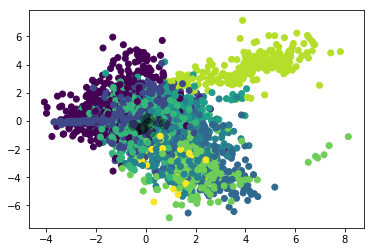

In [ ]:
kmeans_model, colors = cluster()
centers = kmeans_model.cluster_centers_

df = pd.DataFrame(sorted(list(zip(colors, tags)), key=lambda x: x[0]))

df.to_pickle('data_frame_{}'.format(conf.DATA_SOURCE))
df.to_csv('cluster_result_{}.csv'.format(conf.DATA_SOURCE),
          index=False)

# print(centers)
# print(kmeans_model.labels_)

# Got multi-dimensional vectors in the result. Project to plot
pca_2d = PCA(n_components=2).fit_transform(load_model().docvecs.vectors_docs)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=colors,
            picker=True)
plt.scatter(centers[:, 0], centers[:, 1],
            c='black',
            s=100,
            alpha=0.3)

plt.show()
plt.savefig('cluster_plot',
            format='svg')